# Data Science with Machine Learning coursework

Started the coursework with the data preprocessing stage, which includes, data comprehesion, handling missing and outliers, normalisation, and explatory data analysis. After the data was cleaned, it was visualised to discover trends and relationships. before training the models, categorical features need to be converted to numerical, and select features that increase the model's performance. Following that, models are trained with the selected features and labels. At each stage there are two sections, one for **Rashed Alaleeli**, and the other for **Toluwalase Soyebo**.

## Importing required libraries.

In [1]:
#preprocessing and visualisation libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Libraries used for visualisation.
import matplotlib.pyplot as plt
import geopandas as gpd

# Statistics library.
from scipy import stats

# Building tables library.
from tabulate import tabulate

# Library to check the different values in categorical data.
from collections import Counter

# Library to use for imputing construction year missing values.
from sklearn.impute import KNNImputer
from sklearn.metrics import make_scorer

# Used for time conversion.
import datetime

# Dataframe split and parameter tuning libraries.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score

# Feature selection libraries.
from sklearn.feature_selection import SelectKBest, SelectFromModel, f_regression

# Library used for converting categorical to numerical data, and standardising data.
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Classification models libraries.
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Model prediction scores libraries.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, precision_score, recall_score

## Reading Datasets

In [2]:
# Reading datasets csv files.
train = pd.read_csv("training_set_features.csv")
test = pd.read_csv("test_set_features.csv")
labels = pd.read_csv("training_set_labels.csv")

# Data preprocessing - Rashed Alaleeli

## Combining datasets.

Combined both train and test datasets for processing them all at once then will split them back.

In [3]:
# Copying the training and test sets.
train_r = train.copy()
test_r = test.copy()

In [4]:
# Checking the size of each dataset.
print("train size: " + str(train_r.shape))
print("test size: " + str(test_r.shape))

train size: (59400, 40)
test size: (14850, 40)


In [5]:
# Combining rows of each rows with indic specified for each dataset.
df_r = pd.concat([train_r.assign(indic="train"), test_r.assign(indic="test")])

In [6]:
# Checking the shape after combining.
print("combined dataset size: " + str(df_r.shape))

combined dataset size: (74250, 41)


An extra column has been added for the indices so then the data can split back to train and test easily.

## Understanding the dataset

In [7]:
# Printing first five instances from the dataset.
df_r.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,indic
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,train
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,train
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,train
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,train
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,train


In [8]:
# Counting the number of rows and columns.
print("The dataset has " + str(len(df_r)) + " instances, and " + str(len(df_r.columns)) + " features.")

The dataset has 74250 instances, and 41 features.


In [9]:
# Using describe for all columns including numerical and categorical columns.
df_r.describe(include='all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,indic
count,74250.000000,74250.000000,74250,69746,74250.000000,69718,74250.000000,7.425000e+04,74250,74250.000000,...,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250
unique,NaN,NaN,369,2140,NaN,2410,NaN,NaN,45684,NaN,...,8,6,5,5,10,7,3,7,6,2
top,NaN,NaN,2011-03-17,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,train
freq,NaN,NaN,695,11299,NaN,21751,NaN,NaN,4440,NaN,...,63505,63505,41522,41522,21216,21216,57286,35628,43239,59400
mean,37124.500000,318.685704,NaN,NaN,665.667313,NaN,34.074262,-5.701771e+00,NaN,0.462330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21434.273081,2906.762364,NaN,NaN,692.761033,NaN,6.572519,2.944969e+00,NaN,11.537879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18562.250000,0.000000,NaN,NaN,0.000000,NaN,33.086819,-8.525675e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37124.500000,0.000000,NaN,NaN,364.000000,NaN,34.907475,-5.026540e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55686.750000,20.000000,NaN,NaN,1317.000000,NaN,37.181685,-3.325058e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Renaming some columns that are ambiguous.
mapping = {
    'amount_tsh': 'water_amount',
    'wpt_name': 'waterpoint'
}

df_r = df_r.rename(columns=mapping)

## Gathering more information about features.

In [11]:
# Counting the number of zeros in num_private feature.
df_r['num_private'].value_counts()[0]

73299

num_private feature consists mostly of zero and have no description about it.

In [12]:
# Creating a list of the redundant features and then gathering information about them.
redundant_features = df_r[['recorded_by', 'payment', 'payment_type', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'quantity', 'quantity_group', 'source', 'source_type', 'waterpoint_type', 'waterpoint_type_group']]
redundant_features.describe(include='all')

,recorded_by,payment,payment_type,extraction_type,extraction_type_group,extraction_type_class,quantity,quantity_group,source,source_type,waterpoint_type,waterpoint_type_group
count,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250
unique,1,7,7,18,13,7,5,5,10,7,7,6
top,GeoData Consultants Ltd,never pay,never pay,gravity,gravity,gravity,enough,enough,spring,spring,communal standpipe,communal standpipe
freq,74250,31712,31712,33263,33263,33263,41522,41522,21216,21216,35628,43239


After going through the dataset found out that there are several feature the are just redundant. The table above shows for example that payment and payment type have the same count, number of unique values, and the most frequent value. Therefore, decided drop one of them, and that also applies to the other features in the table above.

In [13]:
# Printing unique value of both column to check if they are redundant also.
print(df_r.water_quality.unique())
print(df_r.quality_group.unique())

['soft' 'salty' 'milky' 'unknown' 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned']
['good' 'salty' 'milky' 'unknown' 'fluoride' 'colored']


water_quality and quality_group columns both describe the quality of the water while water_quality provides more information, so will remove one and keep the other.

In [14]:
# Investigating noisy values in the dataframe. 
df_r.loc[(df_r['construction_year'] == 0) & (df_r['water_amount'] == 0), ['construction_year', 'water_amount']].describe()

,construction_year,water_amount
count,25462.0,25462.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [15]:
# Dropping the noisy values.
# df_r = df_r.drop(df_r.loc[(df_r['construction_year'] == 0) & (df_r['water_amount'] == 0)].index)

Found out that there are many samples with contruction year of 0 and water amount of 0, these can be noisy values, and maybe consider to drop them later depending on the performance of the models when evaluating them. 

In [16]:
# Dropped both columns since they mostly contain only one value. 
# num_private has no description and no idea what it is.
df_r = df_r.drop(columns=['num_private', 'recorded_by'])

In [17]:
# All features that will be dropped are redundant.
df_r = df_r.drop(columns=['payment', 'extraction_type', 'extraction_type_group', 'quality_group','quantity_group', 'source', 'waterpoint_type'])

In [18]:
# The shape of the dataframe after dropping features.
df_r.shape

(74250, 32)

## Handling duplicates

In [19]:
# Checking for dublicates.
df_r[df_r.duplicated(keep=False)]

,id,water_amount,date_recorded,funder,gps_height,installer,longitude,latitude,waterpoint,basin,...,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type_group,indic


Both datasets doesn't have any dublicates.

## Handling outliers

#### Detecting outliers in numerical columns.

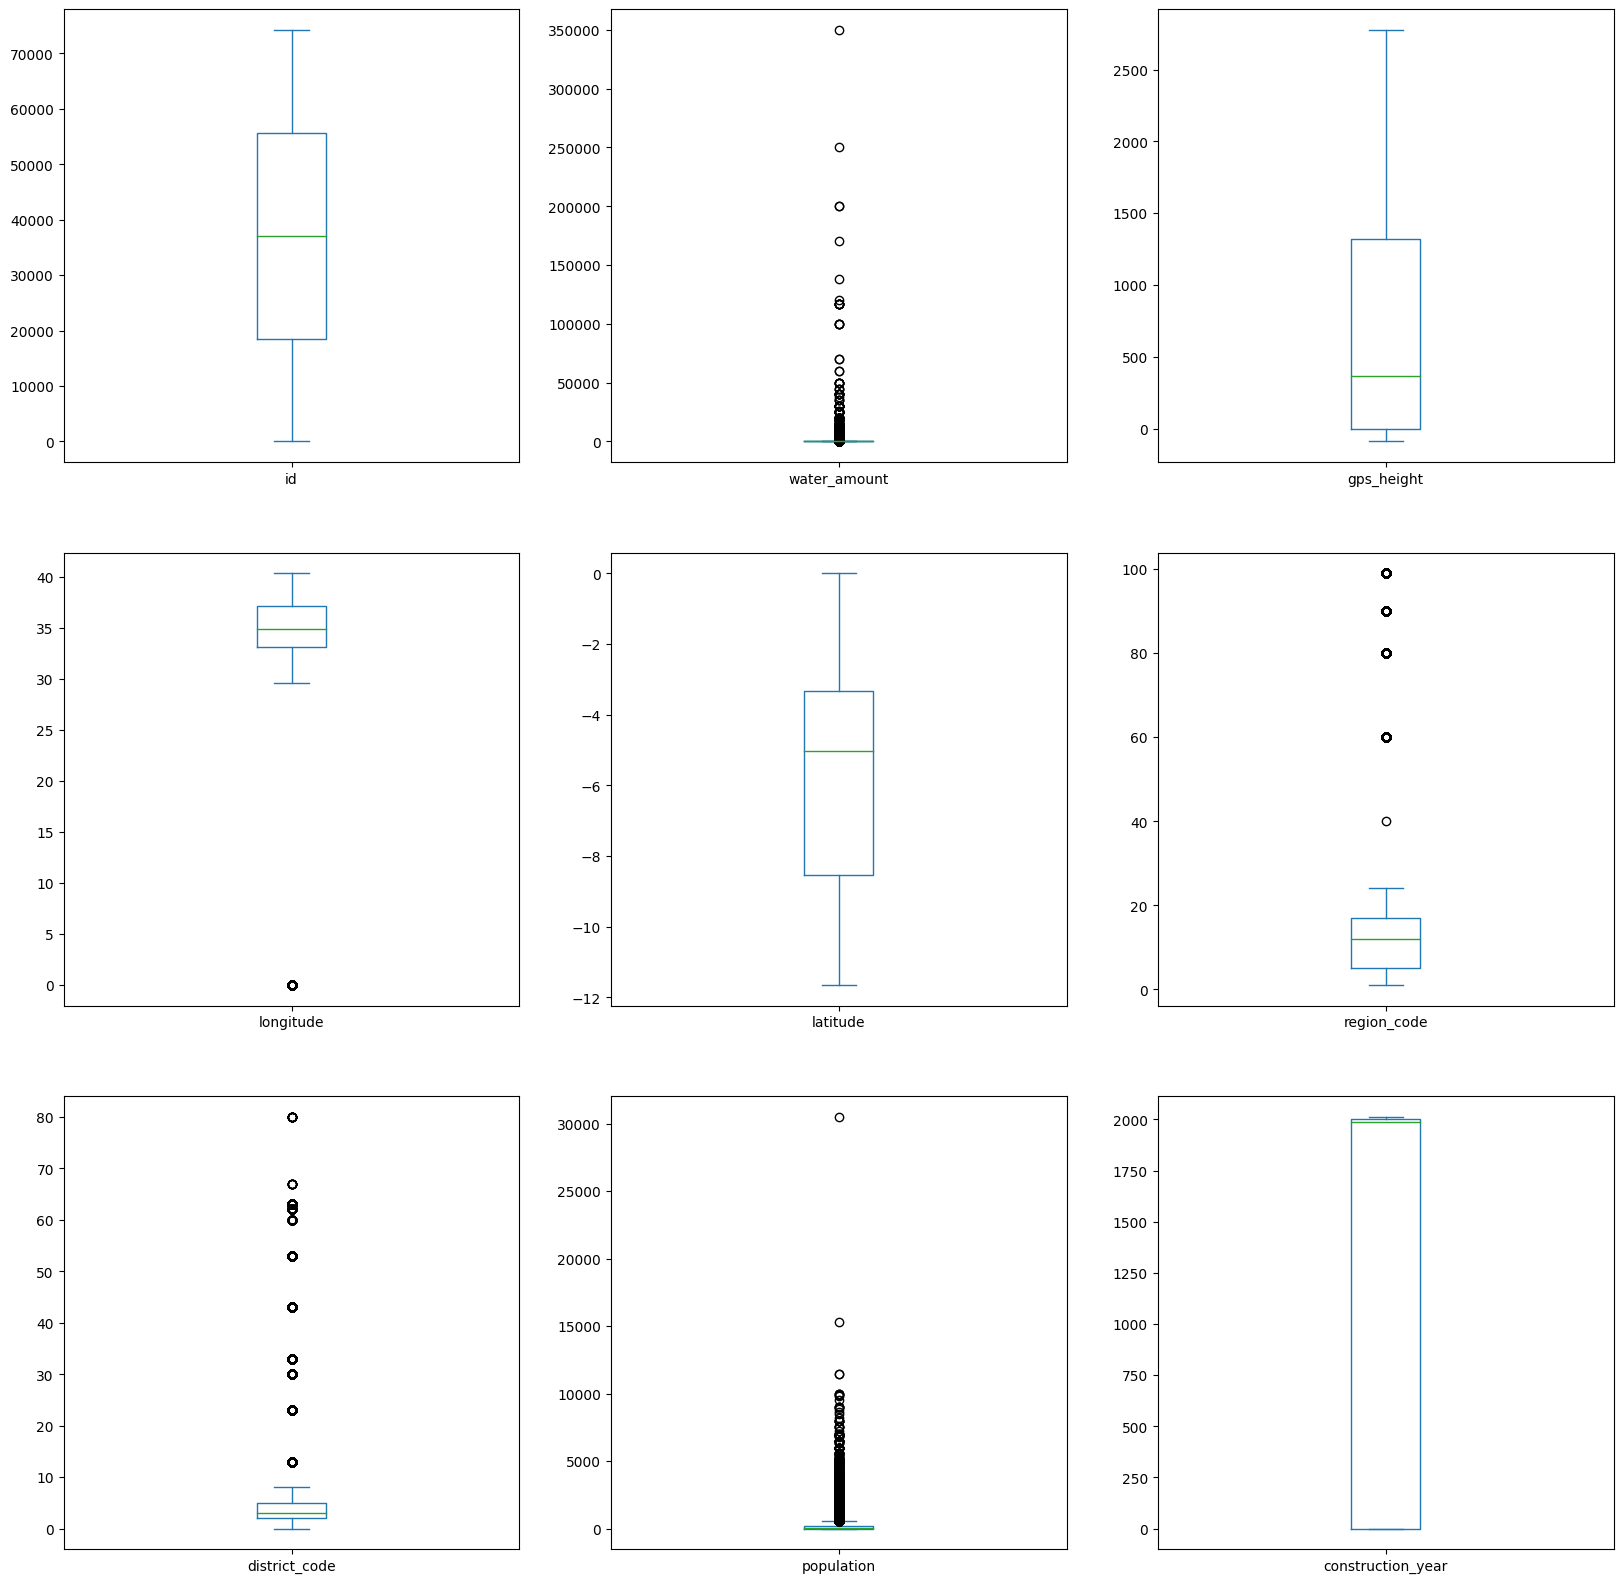

In [20]:
# Checking for outliers using box plots.
boxplot = df_r.iloc[:, :]
boxplot.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=10, figsize=(20,20));

In [21]:
# Selecting only numerical columns.
numerical_columns = df_r.select_dtypes(include=np.number)

# Loop through each column and calculate number of rows that are under 0.05 or above 0.95 quantile.
for col in numerical_columns:
    below_05 = len(df_r[df_r[col] < df_r[col].quantile(0.05)])
    above_05 = len(df_r[df_r[col] > df_r[col].quantile(0.95)])
    print("number of instances under 0.05 is: " + str(below_05) + " and above 0.95 is: " + str(above_05) + " in " + col)

number of instances under 0.05 is: 3713 and above 0.95 is: 3713 in id
number of instances under 0.05 is: 0 and above 0.95 is: 3420 in water_amount
number of instances under 0.05 is: 1881 and above 0.95 is: 3704 in gps_height
number of instances under 0.05 is: 3713 and above 0.95 is: 3713 in longitude
number of instances under 0.05 is: 3713 and above 0.95 is: 3713 in latitude
number of instances under 0.05 is: 2779 and above 0.95 is: 3181 in region_code
number of instances under 0.05 is: 27 and above 0.95 is: 3125 in district_code
number of instances under 0.05 is: 0 and above 0.95 is: 3705 in population
number of instances under 0.05 is: 0 and above 0.95 is: 3147 in construction_year


#### Handling outliers in water amount.

In [22]:
df_r[df_r['water_amount'] > df_r['water_amount'].quantile(0.95)].head()

,id,water_amount,date_recorded,funder,gps_height,installer,longitude,latitude,waterpoint,basin,...,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type_group,indic
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,...,gravity,vwc,user-group,annually,soft,enough,spring,groundwater,communal standpipe,train
38,16583,4000.0,2011-02-20,Cefa,1955,CEFA,35.890264,-8.224399,none,Rufiji,...,gravity,vwc,user-group,annually,soft,enough,river/lake,surface,communal standpipe,train
48,18864,4000.0,2011-02-20,Cefa,1982,CEFA,35.871413,-8.227563,none,Rufiji,...,gravity,vwc,user-group,annually,soft,enough,spring,groundwater,communal standpipe,train
49,25182,1500.0,2011-04-04,District Council,2169,DWE,34.441283,-9.189878,Kwa Bryson Msigwa,Rufiji,...,gravity,vwc,user-group,annually,soft,enough,spring,groundwater,communal standpipe,train
147,66521,2000.0,2011-02-03,Shipo,1603,Shipo,34.988871,-8.911325,none,Rufiji,...,rope pump,vwc,user-group,on failure,soft,enough,borehole,groundwater,hand pump,train


In [23]:
# Minimum of values above quantile 0.95.
print(min(df_r['water_amount'][df_r['water_amount'] > df_r['water_amount'].quantile(0.95)]))
# Mean of water_amount feature.
print(df_r['water_amount'].mean())

1300.0
318.6857043771044


In [24]:
# Replacing outliers with a nan value.
df_r.loc[df_r['water_amount'] > 2000, 'water_amount'] = np.nan

Found the mean of values is nearly 300 and minimum of values above quantile 0.95 is close to the mean so decided to choose a value that is a little bit above the minimum and replace them with nan values which will then be replaced by the mean of amount of water.

#### Handling outliers in gps height.

In [25]:
df_r[df_r['gps_height'] > df_r['gps_height'].quantile(0.95)].head()

,id,water_amount,date_recorded,funder,gps_height,installer,longitude,latitude,waterpoint,basin,...,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type_group,indic
20,48375,200.0,2011-02-27,Twe,2216,TWE,34.473430,-9.594990,none,Lake Nyasa,...,gravity,vwc,user-group,monthly,soft,enough,spring,groundwater,communal standpipe,train
38,16583,NaN,2011-02-20,Cefa,1955,CEFA,35.890264,-8.224399,none,Rufiji,...,gravity,vwc,user-group,annually,soft,enough,river/lake,surface,communal standpipe,train
41,12796,500.0,2011-03-12,Government Of Tanzania,2469,Commu,33.927902,-9.204649,none,Lake Nyasa,...,gravity,vwc,user-group,on failure,soft,enough,spring,groundwater,communal standpipe,train
42,52019,500.0,2011-07-07,European Union,1803,Accra,34.814574,-9.032503,Zahanati-Misssion,Rufiji,...,gravity,wug,user-group,monthly,soft,enough,spring,groundwater,communal standpipe,train
48,18864,NaN,2011-02-20,Cefa,1982,CEFA,35.871413,-8.227563,none,Rufiji,...,gravity,vwc,user-group,annually,soft,enough,spring,groundwater,communal standpipe,train


In [26]:
# Maximum of values above quantile 0.95.
print(max(df_r['gps_height'][df_r['gps_height'] > df_r['gps_height'].quantile(0.95)]))
# Minimum of values above quantile 0.95.
print(min(df_r['gps_height'][df_r['gps_height'] > df_r['gps_height'].quantile(0.95)]))
# Mean of gps_height feature.
print(df_r['gps_height'].mean())

2777
1797
665.6673131313131


In [27]:
# Replacing outliers with a nan value.
df_r.loc[df_r['gps_height'] > df_r['gps_height'].quantile(0.95), 'gps_height'] = np.nan

In [28]:
df_r[df_r['gps_height'] < df_r['gps_height'].quantile(0.05)].head()

,id,water_amount,date_recorded,funder,gps_height,installer,longitude,latitude,waterpoint,basin,...,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type_group,indic
34,41583,0.0,2011-02-23,NaN,-41.0,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,Rufiji,...,handpump,vwc,user-group,never pay,salty,enough,shallow well,groundwater,hand pump,train
152,60983,0.0,2013-03-16,0,-15.0,0,39.527114,-6.988748,Msikitini,Wami / Ruvu,...,motorpump,vwc,user-group,never pay,salty,dry,borehole,groundwater,other,train
181,68908,0.0,2011-03-05,NaN,-21.0,NaN,39.670943,-7.906606,Royal,Rufiji,...,submersible,vwc,user-group,never pay,soft,enough,borehole,groundwater,communal standpipe,train
184,2136,0.0,2011-02-22,NaN,-16.0,NaN,39.854320,-7.783063,Mvivini,Rufiji,...,handpump,vwc,user-group,never pay,salty,enough,shallow well,groundwater,hand pump,train
249,35193,0.0,2011-03-16,Amref,-19.0,AMREF,39.244178,-7.368293,Kwa,Rufiji,...,handpump,vwc,user-group,never pay,soft,dry,shallow well,groundwater,hand pump,train


In [29]:
# Maximum of values below quantile 0.05.
print(max(df_r['gps_height'][df_r['gps_height'] < df_r['gps_height'].quantile(0.05)]))
# Minimum of values below quantile 0.05.
print(min(df_r['gps_height'][df_r['gps_height'] < df_r['gps_height'].quantile(0.05)]))

-1.0
-90.0


In [30]:
# Replacing outliers with a nan value.
df_r.loc[df_r['gps_height'] < df_r['gps_height'].quantile(0.05), 'gps_height'] = np.nan

For gps height feature replaced the values that are below 5% quantile and above 95% quantile with missing values. Then these missing values will filled with the mean of gps height.

#### Handling outliers in population.

In [31]:
df_r['population'][df_r['population'] > df_r['population'].quantile(0.95)].head()

18     1000
78      900
95      950
96     1430
117     804
Name: population, dtype: int64

In [32]:
# Maximum of values above quantile 0.95.
print(max(df_r['population'][df_r['population'] > df_r['population'].quantile(0.95)]))
# Minimum of values above quantile 0.95.
print(min(df_r['population'][df_r['population'] > df_r['population'].quantile(0.95)]))
# Mean of population feature.
print(df_r['population'].mean())

30500
691
180.75082828282828


In [33]:
# Replacing outliers with a nan value.
df_r.loc[df_r['population'] > 3000, 'population'] = np.nan

The difference between the minimum and maximum of values above 95% quantile is so large, also the minimum is really close to the mean of the population, so it wouldn't be efficient to get rid of all values above the quantile, therefore i decided to choose 3000 and any value above it will replaced with nan value which then will be placed the mean of the population.

#### Other columns outliers.

Columns including: id, longitude, latitude, region code, district code, and construction year, did not do any work to them as they represent information that cannot be an outlier after examining them, so decided to keep them as they are.

## Removing incorrect values

In [34]:
# Using describe() to examine both longitude and latitude.
df_r[['longitude', 'latitude']].describe()

,longitude,latitude
count,74250.000000,7.425000e+04
mean,34.074262,-5.701771e+00
std,6.572519,2.944969e+00
min,0.000000,-1.164944e+01
25%,33.086819,-8.525675e+00
50%,34.907475,-5.026540e+00
75%,37.181685,-3.325058e+00
max,40.345193,-2.000000e-08


After examining both longitude and latitude, found that longitude have zeros which doesn't make sense for tanzantia, as longitude 0 runs through Greenwich, England. These values will be dropped.

In [35]:
# Checking the noisy values.
df_r.loc[df_r['longitude'] == 0, ['longitude', 'latitude']]

,longitude,latitude
21,0.0,-2.000000e-08
53,0.0,-2.000000e-08
168,0.0,-2.000000e-08
177,0.0,-2.000000e-08
253,0.0,-2.000000e-08
...,...,...
14649,0.0,-2.000000e-08
14676,0.0,-2.000000e-08
14766,0.0,-2.000000e-08
14831,0.0,-2.000000e-08


After searching for these points found that they are somewhere in the Gulf of Guinea, and that is far from tanzania.

In [36]:
# Dropping values that equals to zero.
df_r = df_r[df_r.longitude != 0]

## Handling missing values.

In [37]:
# Counting the number of null values in each column of the dataset.
null_count = df_r.isna().sum()
print(null_count)

id                           0
water_amount              2283
date_recorded                0
funder                    4488
gps_height                5585
installer                 4511
longitude                    0
latitude                     0
waterpoint                   0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                 328
public_meeting            3708
scheme_management         4678
scheme_name              33411
permit                    3793
construction_year            0
extraction_type_class        0
management                   0
management_group             0
payment_type                 0
water_quality                0
quantity                     0
source_type                  0
source_class                 0
waterpoint_type_group        0
indic                        0
dtype: i

The dataset overall have no missing values in most of the features just several. However, scheme_name feature has many missing values nearly half the dataset while the others is smaller compared to scheme_name.

#### Handling missing values in numerical and boolean features.

In [38]:
# Filling missing value in 'water_amount' by the mean of the feature.
df_r['water_amount'] = df_r['water_amount'].fillna(df_r['water_amount'].mean())

C:\Users\psyts12\AppData\Local\Temp\ipykernel_9524\577586715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['water_amount'] = df_r['water_amount'].fillna(df_r['water_amount'].mean())


In [39]:
# Filling missing value in 'gps_height' by the mean of the feature.
df_r['gps_height'] = df_r['gps_height'].fillna(round(df_r['gps_height'].mean()))

C:\Users\psyts12\AppData\Local\Temp\ipykernel_9524\2814927005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['gps_height'] = df_r['gps_height'].fillna(round(df_r['gps_height'].mean()))


In [40]:
# Filling missing value in 'population' by the mean of the feature and then round it.
df_r['population'] = df_r['population'].fillna(round(df_r['population'].mean()))

C:\Users\psyts12\AppData\Local\Temp\ipykernel_9524\3160748370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['population'] = df_r['population'].fillna(round(df_r['population'].mean()))


The above features are numerical features so the most appropriate way to fill them is using their mean value.

In [41]:
# Filling missing value in 'public_meeting' by the most frequent value in the feature.
df_r['public_meeting'] = df_r['permit'].fillna(df_r['public_meeting'].mode)

C:\Users\psyts12\AppData\Local\Temp\ipykernel_9524\861535782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['public_meeting'] = df_r['permit'].fillna(df_r['public_meeting'].mode)


In [42]:
# Filling missing value in 'public_meeting' by the most frequent value in the feature.
df_r['permit'] = df_r['permit'].fillna(df_r['permit'].mode)

C:\Users\psyts12\AppData\Local\Temp\ipykernel_9524\2911263055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['permit'] = df_r['permit'].fillna(df_r['permit'].mode)


Both features are boolean so decided to replace the missing data with the most frequent values.

In [43]:
df_r = df_r.drop(columns=['scheme_name'])

dropped 'scheme_name' because it has many missing values and would not affect much the training process. Also, it provide information that is nearly similar to 'scheme_management', so drop one and keep the other.

#### Handling missing values in categorical features.

In [44]:
# Finding the most frequent values in 'funder'.
df_r.funder.value_counts().to_frame()

,funder
Government Of Tanzania,11003
Danida,3907
Hesawa,2414
World Bank,1693
Kkkt,1623
...,...
Dwsdp,1
Said Salum Ally,1
Government And Community,1
Jamal Abdallah,1


In [45]:
# Defining a function that will rename column values in feature 'funder'.
def rename_funder(row):
    if row['funder'] == 'Government Of Tanzania':
        return 'Government Of Tanzania'
    elif row['funder'] == 'Danida':
        return 'Danida'
    elif row['funder'] == 'Hesawa':
        return 'Hesawa'
    elif row['funder'] == 'Rwssp':
        return 'Rwssp'
    elif row['funder'] == 'World Bank':
        return 'World Bank'
    elif row['funder'] == np.nan: # Any missing values will be replaced with 'unknown'.
        return 'unknown'
    else:
        return 'other' # Any values other than the top 5 frequent values with be replaced with 'other'.

In [46]:
# Applying the function to the feature.
df_r['funder'] = df_r.apply(lambda x: rename_funder(x), axis=1)

In [47]:
# Finding the most frequent values in 'installer'.
df_r.installer.value_counts().to_frame()

,installer
DWE,20310
Government,2096
RWE,1467
Commu,1347
DANIDA,1305
...,...
Megis,1
ISSAA KANYANGE,1
Mtwara Technician,1
Pet Corporation Ltd,1


In [48]:
# Defining a function that will rename column values in feature 'installer'.
def rename_installer(row):
    if row['installer'] == 'DWE':
        return 'DWE'
    elif row['installer'] == 'Government':
        return 'GOV'
    elif row['installer'] == 'RWE':
        return 'RWE'
    elif row['installer'] == 'Commu':
        return 'Commu'
    elif row['installer'] == 'DANIDA':
        return 'DANIDA'
    elif row['installer'] == np.nan: # Any missing values will be replaced with 'unknown'.
        return 'unknown'
    else:
        return 'other' # Any values other than the top 5 frequent values with be replaced with 'other'.

In [49]:
# Applying the function to the feature.
df_r['installer'] = df_r.apply(lambda x: rename_installer(x), axis=1)

In [50]:
# Finding the most frequent values in 'scheme_management'.
df_r.scheme_management.value_counts().to_frame()

,scheme_management
VWC,45118
WUG,5301
Water authority,3973
WUA,3550
Water Board,3461
Parastatal,2023
Company,1341
Private operator,1326
Other,994
SWC,123


In [51]:
# Filling null values with 'unknown'.
df_r['scheme_management'] = df_r['scheme_management'].fillna('unknown')

It appears that 'scheme_management' does not have many unique value and the value counts between them doesn't have much of difference, so it wouldn't be appropiate to rename values. So instead I decied to just replace missing values with 'unknown'.

In [52]:
# Finding the most frequent values in 'subvillage'.
df_r.subvillage.value_counts()

Shuleni       627
Majengo       619
Madukani      538
Kati          457
Mtakuja       316
             ... 
Mandunda B      1
Kilozea         1
Ludipe          1
Lazi            1
Kosoro          1
Name: subvillage, Length: 20617, dtype: int64

In [53]:
# Filling null values with 'unknown'.
df_r['subvillage'] = df_r['subvillage'].fillna('unknown')

There are many unique values in 'subvillage' so it wouldn't be appropiate to just rename them. Instead, replacing null values with 'unknown' would be a good idea.

In [54]:
# Count of categorical value with none.
len(df_r[np.isin(df_r, ['None', 'none']).any(axis=1)])

4354

In [55]:
# Selecting columns that contains none.
df_r.columns[df_r.isin(['None', 'none']).any()]

Index(['waterpoint', 'scheme_management'], dtype='object')

In [56]:
# Printing rows in scheme management where there is a none value.
df_r.loc[(df_r['scheme_management'] == 'None') | (df_r['scheme_management'] == 'none'), 'scheme_management']

23603    None
Name: scheme_management, dtype: object

In [57]:
# Since it's only one then will drop the row.
df_r = df_r.drop(df_r[df_r['scheme_management'] == 'None'].index)

In [58]:
# Counting the number of unique value in waterpoint.
df_r.waterpoint.value_counts()

none                4351
Shuleni             2165
Zahanati            1015
Msikitini            645
Kanisani             389
                    ... 
Mzee Sad               1
Kwa Kitwe              1
Mayiyi                 1
Hamia A-1              1
Kwa Mzee Chagala       1
Name: waterpoint, Length: 44865, dtype: int64

In [59]:
# Dropping waterpoint feature.
df_r = df_r.drop(columns=['waterpoint'])

Since waterpoint have many unique values with none being the most frequent one so dropping it won't affect the accuracy of the algorithm.

In [60]:
# Finding unique values in construction year attribute.
years = df_r.construction_year.unique()
years.sort()
print(years)

[   0 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013]


In [61]:
# Counting the number of zeros in construction year.
zero_years = df_r.loc[df_r['construction_year'] == 0, ['construction_year']]
zero_years.construction_year.value_counts()

0    23700
Name: construction_year, dtype: int64

In [62]:
# Extracting the year from the date.
df_r['date_recorded'] = pd.to_datetime(df_r['date_recorded'])
df_r['year_recorded'] = df_r['date_recorded'].dt.year

# A function that will calculate the age of the pump.
def calculate_pump_age(row):
    if row['construction_year'] == 0:
        # If the construction year equals zero then we will place it with null.
        return np.nan 
    else:
        # Calculating the age by subtraction the year recorded from the construction year.
        age = row['year_recorded'] - row['construction_year']
        return age

# Applying the function to create a new column with the ages.
df_r['age_since_recorded'] = df_r.apply(lambda x: calculate_pump_age(x), axis = 1)
ages = df_r.age_since_recorded.unique()
ages.sort()
print(ages)

[-7. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.
 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. nan]


In [63]:
# Checking ages below zero.
values = [-7, -5, -4, -3, -2, -1]
df_r.loc[(df_r['age_since_recorded'].isin(values)), ['date_recorded', 'construction_year']]

,date_recorded,construction_year
8729,2004-05-01,2008
10441,2004-12-01,2006
13366,2004-06-01,2011
23373,2004-03-01,2009
27501,2004-01-07,2009
32619,2004-03-01,2005
33942,2004-03-01,2007
39559,2004-03-06,2009
48555,2004-12-01,2008
2922,2004-01-04,2008


After examining ages below zero it appears that the data recorded was even before the pump existed which does not make any sense.

In [64]:
# Dropping rows with wrong ages.
df_r = df_r.drop(df_r[df_r['age_since_recorded'] < 0].index)
# Checking the number of null values
df_r['age_since_recorded'].isna().sum()

23698

In [65]:
# Max age of pumps since last record.
print(max(df_r.age_since_recorded))

53.0


In [66]:
# Replacing null value in ages with 60.
df_r['age_since_recorded'] = df_r['age_since_recorded'].fillna(60)

In [67]:
# After creating age column we do not need these columns so will drop them.
df_r = df_r.drop(columns=['date_recorded', 'construction_year', 'year_recorded'])

In [68]:
# Printing number of missing values in each column after handling them.
print("Number of null values in the dataframe is: " + str(df_r.isnull().values.sum()))

Number of null values in the dataframe is: 0


## Data normalisation

$$
\frac{X - X_{min}}{X_{max}-X_{min}}
$$

In [69]:
# Checking the minimum and maximum of 'water_amount' feature.
df_r['water_amount'].describe()

count    71963.000000
mean       109.641032
std        309.578953
min          0.000000
25%          0.000000
50%          0.000000
75%         30.000000
max       2000.000000
Name: water_amount, dtype: float64

In [70]:
# Normalizing the feature using min-max normalization.
# df_r['water_amount'] = ((df_r['water_amount']-df_r['water_amount'].min()) /(df_r['water_amount'].max()-df_r['water_amount'].min()))

In [71]:
# Checking the minimum and maximum of 'water_amount' feature.
df_r['population'].describe()

count    71963.000000
mean       163.653628
std        302.758622
min          0.000000
25%          0.000000
50%         35.000000
75%        225.000000
max       3000.000000
Name: population, dtype: float64

In [72]:
# Normalizing the feature using min-max normalization.
# df_r['population'] = ((df_r['population']-df_r['population'].min()) /(df_r['population'].max()-df_r['population'].min()))

The use of normalisation is depends on the model's performance, this will be considered lated when evaluating the models.

## Exploratory Data Analysis (EDA) 

In [73]:
# Exploring the datatypes of the data.
df_r.dtypes

id                         int64
water_amount             float64
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population               float64
public_meeting            object
scheme_management         object
permit                    object
extraction_type_class     object
management                object
management_group          object
payment_type              object
water_quality             object
quantity                  object
source_type               object
source_class              object
waterpoint_type_group     object
indic                     object
age_since_recorded       float64
dtype: object

After checking the values in the csv sheet, found these features does not match the type in the csv sheet. Also, 'age_since_recorded' was produced by subtracting years so the result should be integer not float.

In [74]:
# Converting features from float to int.
df_r[['gps_height', 'population', 'age_since_recorded']] = df_r[['gps_height', 'population', 'age_since_recorded']].astype('int')

In [75]:
# Spliting the data back to train and test after preprocessing.
test_r, train_r = df_r[df_r["indic"].eq("test")], df_r[df_r["indic"].eq("train")]

# Merging the labels with the training set.
df_r = pd.merge(train_r, labels, on='id')

# Dropping column 'indic' as it's no longer needed.
df_r = df_r.drop(columns=['indic'])
df_r.head()

,id,water_amount,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,...,management,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type_group,age_since_recorded,status_group
0,69572,109.638204,other,1390,other,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,...,vwc,user-group,annually,soft,enough,spring,groundwater,communal standpipe,12,functional
1,8776,0.000000,other,1399,other,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,...,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,3,functional
2,34310,25.000000,other,686,other,37.460664,-3.821329,Pangani,Majengo,Manyara,...,vwc,user-group,per bucket,soft,enough,dam,surface,communal standpipe,4,functional
3,67743,0.000000,other,263,other,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,vwc,user-group,never pay,soft,dry,borehole,groundwater,communal standpipe,27,non functional
4,19728,0.000000,other,0,other,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,...,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,60,functional


# Data preprocessing - Toluwalase Soyebo

### Reading the dataset

In [76]:
df_tr = train.copy()
df_lbl = labels.copy()
test_df = test.copy()

### Combining the dataset

In [77]:
# Combining the dataset, so all the training dataset is one. 
train_df = pd.merge(df_tr,df_lbl,on='id', how='inner')

### Understanding the dataset

In [78]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [79]:
print('training dataset shape is ', train_df.shape, 'with '+ str(len(train_df)) + ' instances and ' + str(len(train_df.columns)) + ' features')
print('test dataset shape is ', test_df.shape, 'with '+ str(len(test_df)) + ' instances and ' + str(len(test_df.columns)) + ' features')

training dataset shape is  (59400, 41) with 59400 instances and 41 features
test dataset shape is  (14850, 40) with 14850 instances and 40 features


In [80]:
train_df.describe(include='all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400.000000,59400.000000,59400,55765,59400.000000,55745,59400.000000,5.940000e+04,59400,59400.000000,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,356,1897,NaN,2145,NaN,NaN,37400,NaN,...,8,6,5,5,10,7,3,7,6,3
top,NaN,NaN,2011-03-15,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


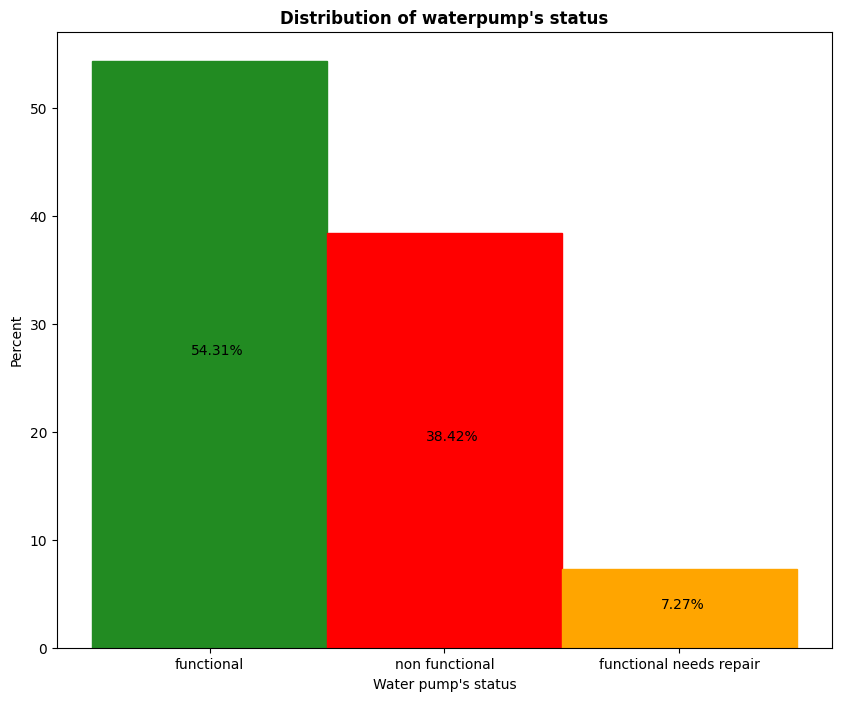

In [81]:
# Basic histogram to visualise the distribution of data for the target variable class (status_group).
plt.subplots(figsize=(10,8))
train_ax = sns.histplot(data=train_df, x='status_group', stat='percent')

plt.title("Distribution of waterpump's status", fontweight='bold')
plt.xlabel("Water pump's status")

colors = ['forestgreen', 'red', 'orange']

for i, p in enumerate(train_ax.patches):
        train_ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.42, p.get_height()*0.5))
        p.set_color(colors[i % len(colors)])
        
plt.savefig('functionality.png', dpi=300, bbox_inches='tight')
        
plt.show()

### Getting more information about features

In [82]:
# Analysing how many unique values each training column has. 
for column in train_df.columns:
    print(f'the {column} has: {train_df[column].nunique()}')

the id has: 59400
the amount_tsh has: 98
the date_recorded has: 356
the funder has: 1897
the gps_height has: 2428
the installer has: 2145
the longitude has: 57516
the latitude has: 57517
the wpt_name has: 37400
the num_private has: 65
the basin has: 9
the subvillage has: 19287
the region has: 21
the region_code has: 27
the district_code has: 20
the lga has: 125
the ward has: 2092
the population has: 1049
the public_meeting has: 2
the recorded_by has: 1
the scheme_management has: 12
the scheme_name has: 2696
the permit has: 2
the construction_year has: 55
the extraction_type has: 18
the extraction_type_group has: 13
the extraction_type_class has: 7
the management has: 12
the management_group has: 5
the payment has: 7
the payment_type has: 7
the water_quality has: 8
the quality_group has: 6
the quantity has: 5
the quantity_group has: 5
the source has: 10
the source_type has: 7
the source_class has: 3
the waterpoint_type has: 7
the waterpoint_type_group has: 6
the status_group has: 3


Would have expected region and region_code to have the same unique values, so this will be further investigated when checking for incorrect values, recorded_by only has one unique value so this shows to not provide valid information. 

In addition there are some columns that have similar name and should be further investigated. 

In [83]:
# from the column name these features appear to be similar to another feature
similar_features = ['scheme_management', 'management','scheme_name', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 
                   'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 
                   'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group' ]

In [84]:
#getting all the numeric columns in the dataset
numeric_column = train_df.select_dtypes(include='number').columns.tolist()[1:]

In [85]:
# Checking how the number 0, affects the numeric column dataset.
for n in numeric_column:
    if 0 in train_df[n].values:
        n_zerovalue = round(train_df[n].value_counts()[0])
        print(str(n) + ':',n_zerovalue/len(train_df) * 100,'%')

amount_tsh: 70.09932659932659 %
gps_height: 34.40740740740741 %
longitude: 3.05050505050505 %
num_private: 98.72558922558923 %
district_code: 0.038720538720538725 %
population: 35.994949494949495 %
construction_year: 34.86363636363636 %


C:\Users\psyts12\AppData\Local\Temp\ipykernel_9524\2628608215.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


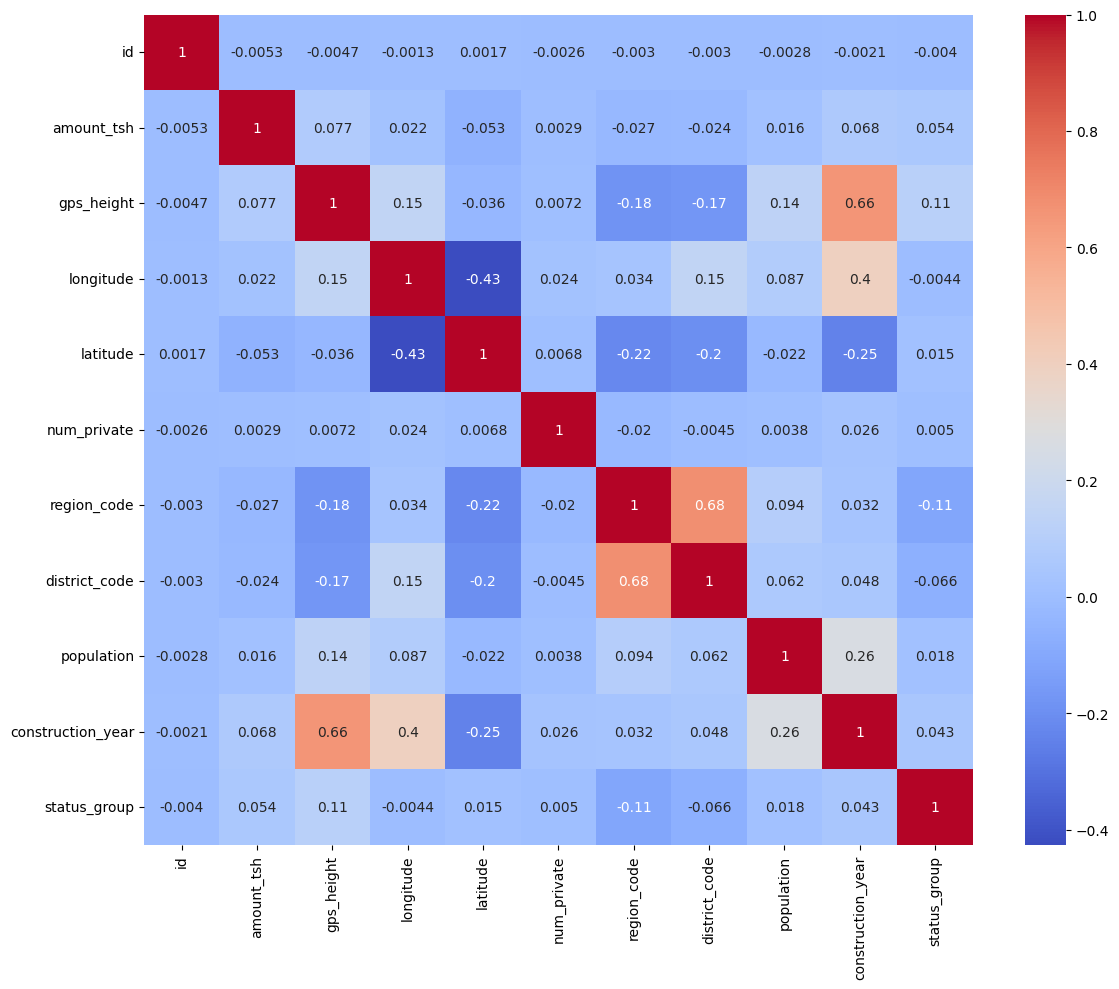

In [86]:
# Checking for correlations between numerical features and also target value, to see if there are other obviuous redunandant features.
train_df['status_group'].replace('functional',2, inplace=True)
train_df['status_group'].replace('functional needs repair',1, inplace=True)
train_df['status_group'].replace('non functional',0, inplace=True)

corr_matrix = train_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

train_df['status_group'].replace(2,'functional', inplace=True)
train_df['status_group'].replace(1,'functional needs repair', inplace=True)
train_df['status_group'].replace(0,'non functional',inplace=True)

From this we can see that the numeric columns with the highest correlation, is region_code adn district code, and the second highest correlation is gps_height and construction year. Third highest correlation is construction_year and longitude. Although this needs to be evaluated more with the pearson correlation. 

In [87]:
pearson_coef, p_value = stats.pearsonr(train_df['region_code'], train_df['district_code'])
print("The Pearson Correlation Coefficient between region code and district code is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(train_df['gps_height'], train_df['construction_year'])
print("The Pearson Correlation Coefficient between gps_height and construction year is", pearson_coef, " with a P-value of P =", p_value) 

pearson_coef, p_value = stats.pearsonr(train_df['longitude'], train_df['construction_year'])
print("The Pearson Correlation Coefficient between longitude and construction year is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient between region code and district code is 0.6786023067887993  with a P-value of P = 0.0
The Pearson Correlation Coefficient between gps_height and construction year is 0.6587269743635635  with a P-value of P = 0.0
The Pearson Correlation Coefficient between longitude and construction year is 0.3967316258918344  with a P-value of P = 0.0


A correlation of 0 suggests that there is no evidence that the correlation is significant. 

In [88]:
# from gathering extra information these numerical columns could be dropped.
drop_num_columns = ['num_private', 'district_code']
train_df = train_df.drop(drop_num_columns, axis=1)
test_df = test_df.drop(drop_num_columns, axis=1)

In [89]:
# From initial research of the question there also seems to be columns that are very similar. 
ctg_df = train_df.select_dtypes(include=['object'])
ctg_df.describe()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,...,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


In [90]:
similar_features_df = train_df[similar_features]
similar_features_df.describe()

,scheme_management,management,scheme_name,extraction_type,extraction_type_group,extraction_type_class,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,55523,59400,31234,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,12,12,2696,18,13,7,5,7,7,8,6,5,5,10,7,3,7,6
top,VWC,vwc,K,gravity,gravity,gravity,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,36793,40507,682,26780,26780,26780,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [91]:
# checking for similar values in the column. 
for column in similar_features_df.columns:
    print(f'the {column} has: {similar_features_df[column].unique()} \n')

the scheme_management has: ['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None'] 

the management has: ['vwc' 'wug' 'other' 'private operator' 'water board' 'wua' 'company'
 'water authority' 'parastatal' 'unknown' 'other - school' 'trust'] 

the scheme_name has: ['Roman' nan 'Nyumba ya mungu pipe scheme' ... 'BL Nsherehehe'
 'Magati  gravity spri' 'Mtawanya'] 

the extraction_type has: ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'ksb' 'mono' 'windmill' 'afridev' 'other - rope pump' 'india mark iii'
 'other - swn 81' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga'] 

the extraction_type_group has: ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'mono' 'wind-powered' 'afridev' 'rope pump' 'india mark iii'
 'other handpump' 'other motorpump'] 

the extraction_type_class has: ['gravity' 'submersible' 'handpump' 'other' 'motorpump' 'wind-

can see the values are similar so can easily drop one of these and therefore can drop one of the types. Also can drop the categorical columns that are irrelevant. 

In [92]:
# Could possibly do more analysis on why certain features are being dropped. 
drop_ctg_columns = ['wpt_name', 'subvillage', 'lga', 'ward','recorded_by','scheme_name', 
                'extraction_type_group', 'extraction_type_class', 'management','management_group', 'payment_type',
               'water_quality', 'quantity_group','source_type', 'waterpoint_type_group']

train_df = train_df.drop(drop_ctg_columns, axis=1)
test_df = test_df.drop(drop_ctg_columns, axis=1)

In [93]:
train_df.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
basin                   0
region                  0
region_code             0
population              0
public_meeting       3334
scheme_management    3877
permit               3056
construction_year       0
extraction_type         0
payment                 0
quality_group           0
quantity                0
source                  0
source_class            0
waterpoint_type         0
status_group            0
dtype: int64

In [94]:
train_df.dtypes

id                     int64
amount_tsh           float64
date_recorded         object
funder                object
gps_height             int64
installer             object
longitude            float64
latitude             float64
basin                 object
region                object
region_code            int64
population             int64
public_meeting        object
scheme_management     object
permit                object
construction_year      int64
extraction_type       object
payment               object
quality_group         object
quantity              object
source                object
source_class          object
waterpoint_type       object
status_group          object
dtype: object

## Handling duplicates

In [95]:
# Checking for duplicate values in the training datase.
train_df[train_df.duplicated(keep=False)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,...,permit,construction_year,extraction_type,payment,quality_group,quantity,source,source_class,waterpoint_type,status_group


In [96]:
# Checking for duplicate values in the test dataset.
test_df[test_df.duplicated(keep=False)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,...,scheme_management,permit,construction_year,extraction_type,payment,quality_group,quantity,source,source_class,waterpoint_type


## Handling outliers

In [97]:
# Update the numeric_column as some columns as been dropped, and understand the basic stats for the dataset.

removed_columns = ('num_private', 'district_code')
numeric_column = [col for col in numeric_column if col not in removed_columns]
for column in numeric_column:
    print(f'{column} Kurtosis: {train_df[column].kurtosis()} Skewness: {train_df[column].skew()}  \n' )

amount_tsh Kurtosis: 4903.543101955053 Skewness: 57.8077999458852  

gps_height Kurtosis: -1.2924401348688863 Skewness: 0.4624020849809572  

longitude Kurtosis: 19.18703104843437 Skewness: -4.191046454962571  

latitude Kurtosis: -1.0576166659480706 Skewness: -0.1520365708701084  

region_code Kurtosis: 10.288433410504723 Skewness: 3.1738181098177294  

population Kurtosis: 402.28011526096975 Skewness: 12.660713588843592  

construction_year Kurtosis: -1.5964323687041613 Skewness: -0.6349277865999228  



In [98]:
numeric_df = train_df[numeric_column]

amount_tsh              AxesSubplot(0.125,0.653529;0.227941x0.226471)
gps_height           AxesSubplot(0.398529,0.653529;0.227941x0.226471)
longitude            AxesSubplot(0.672059,0.653529;0.227941x0.226471)
latitude                AxesSubplot(0.125,0.381765;0.227941x0.226471)
region_code          AxesSubplot(0.398529,0.381765;0.227941x0.226471)
population           AxesSubplot(0.672059,0.381765;0.227941x0.226471)
construction_year           AxesSubplot(0.125,0.11;0.227941x0.226471)
dtype: object

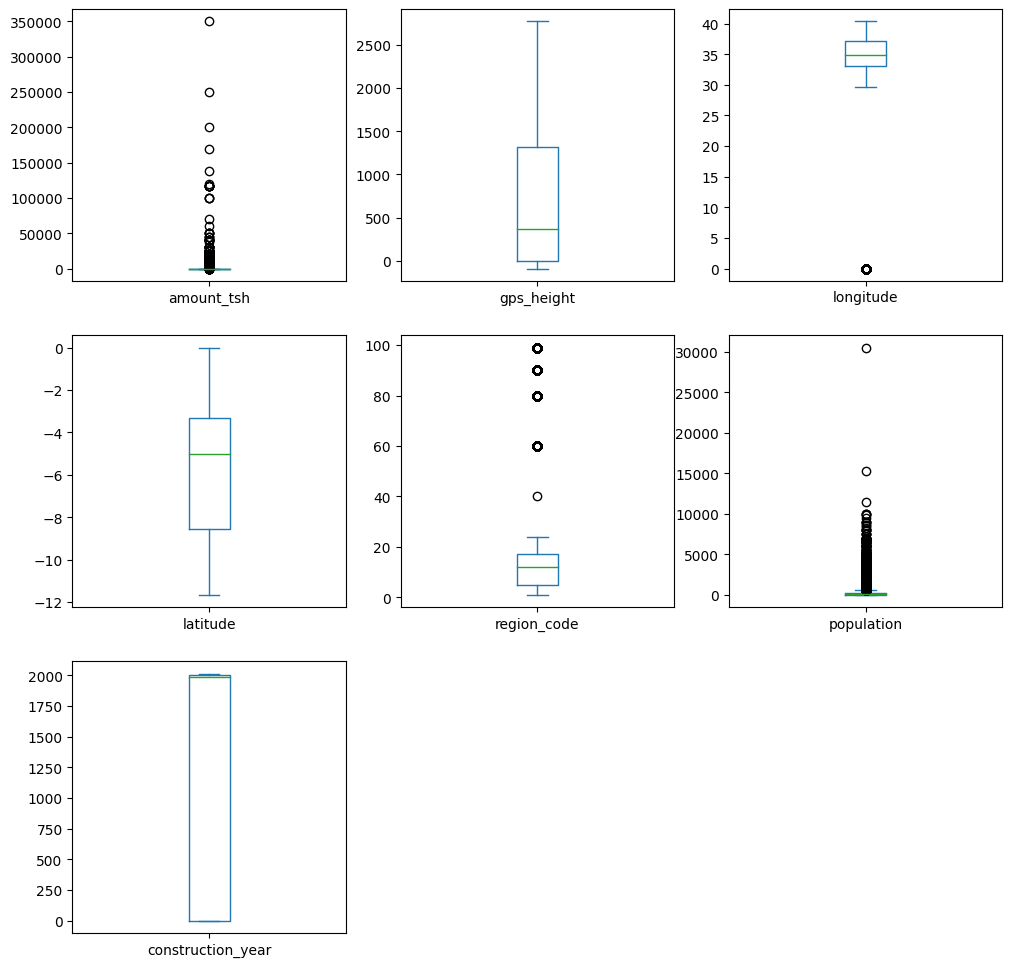

In [99]:
numeric_df.plot(kind='box', subplots=True, layout=(3,3), figsize=(12,12))

- Drawing the boxplot highlights my inital thought of the columns with high kurtosis and skewness having outliers, although also draws my attention to the longitude column, and the reason for the outlier. 
- the region_code will be investigated later

##### Investigate longitude

In [100]:
longitude_5_outlier = train_df['longitude'].quantile(0.05)

In [101]:
print(longitude_5_outlier)
print(train_df['longitude'].min())

30.040660006499998
0.0


In [102]:
# drop the outliers for longitude
train_df.drop(train_df[train_df['longitude'] == 0].index, inplace=True)
test_df.drop(train_df[train_df['longitude'] == 0].index, inplace=True)

##### Handling amount_tsh outliers

In [103]:
# As most values where kurtosis is high have a large % of 0, decided to set these values as missing values. 
tsh_95_outlier = train_df['amount_tsh'].quantile(0.95)
tsh_5_outlier = train_df['amount_tsh'].quantile(0.05)
df = train_df[train_df['amount_tsh'] > tsh_95_outlier]
n_df = train_df[train_df['amount_tsh'] <= tsh_5_outlier]

# How many instances are outliers.
print('there are', len(n_df), 'instances below or equal to 0.05')
print('there are', len(df), 'instances above 0.95')
print('there are', len(n_df) + len(df), 'outliers in the amount_tsh')

tsh_95_outlier_t = test_df['amount_tsh'].quantile(0.95)
tsh_5_outlier_t = test_df['amount_tsh'].quantile(0.05)

there are 39827 instances below or equal to 0.05
there are 2723 instances above 0.95
there are 42550 outliers in the amount_tsh


In [104]:
# So all values that are 0, is being treated as a missing value, and we can see the difference in the minimum value. 
print(train_df['amount_tsh'].min())
train_df.loc[train_df['amount_tsh'] <= tsh_5_outlier, 'amount_tsh'] = np.nan
test_df.loc[test_df['amount_tsh'] <= tsh_5_outlier_t, 'amount_tsh'] = np.nan
print(train_df['amount_tsh'].min())

0.0
0.2


Some detailed analysis and experimenting more of the data was done here to get a better understanding of the amount_tsh column: 
comparing the instances of values above the 95 quantile it ranges from 1300 - 350000, so therefore we can assume that this error may be caused because of decimal placement issues during the input of the data and asa result, can divide all numbers above 900, just below the 95 quantile, which was 1200. 
7315 insatnces between 100 and 95 quantile(1300). therefore dividing by 100. 
Also after the 95% quantile the next largest value is 1000, and there are a few insatnces of these, so might not actually be an error.

In [105]:
#handling upper bound outliers for the 'amount_tsh '
upper_amount = train_df['amount_tsh'] > 900
train_df.loc[upper_amount, 'amount_tsh'] = train_df['amount_tsh'] / 100

upper_amount_t = test_df['amount_tsh'] > 900
test_df.loc[upper_amount_t, 'amount_tsh'] = test_df['amount_tsh'] / 100

##### Handling gps_height outliers

In [106]:
gps_95_outlier = train_df['gps_height'].quantile(0.95)
gps_5_outlier = train_df['gps_height'].quantile(0.05)
df = train_df[train_df['gps_height'] > gps_95_outlier]
n_df = train_df[train_df['gps_height'] < gps_5_outlier]
                
# How many instances are outliers.
print('there are', len(n_df), 'instances below 0.05')
print('there are', len(df), 'instances above 0.95')
print('there are', len(n_df) + len(df), 'outliers in the gps_height')

gps_95_outlier_t = test_df['gps_height'].quantile(0.95)
gps_5_outlier_t = test_df['gps_height'].quantile(0.05)

there are 1496 instances below 0.05
there are 2867 instances above 0.95
there are 4363 outliers in the gps_height


In [107]:
print(train_df['gps_height'].min())
train_df.loc[train_df['gps_height'] < gps_5_outlier, 'gps_height'] = gps_5_outlier
test_df.loc[test_df['gps_height'] < gps_5_outlier_t, 'gps_height'] = gps_5_outlier_t
print(train_df['gps_height'].min())

-90
0


In [108]:
# Making the instances above the outliers to be handled with missing data. 
train_df.loc[train_df['gps_height'] > gps_95_outlier, 'gps_height'] = gps_95_outlier
test_df.loc[test_df['gps_height'] > gps_95_outlier_t, 'gps_height'] = gps_95_outlier_t

The gps_height was more straight forward to handel, as 0 was not the minimum value as well as the 0.05 quartile, in addition, as the discrepancy betwwen the 0.95 quantile and the other values were not a lot, it was able to set them to be missing values. 

##### Handling population outliers

In [109]:
pop_95_outlier = train_df['population'].quantile(0.95)
pop_5_outlier = train_df['population'].quantile(0.05)
print(pop_95_outlier)
print(pop_5_outlier)

df = train_df[train_df['population'] > pop_95_outlier]
n_df = train_df[train_df['population'] <= pop_5_outlier]
                
# how many instances are outliers
print('there are', len(n_df), 'instances below or equal to  0.05')
print('there are', len(df), 'instances above 0.95')
print('there are', len(n_df) + len(df), 'outliers in the population')

pop_95_outlier_t = test_df['population'].quantile(0.95)
pop_5_outlier_t = test_df['population'].quantile(0.05)

700.0
0.0
there are 19569 instances below or equal to  0.05
there are 2739 instances above 0.95
there are 22308 outliers in the population


In [110]:
print(train_df['population'].min())
train_df.loc[train_df['population'] <= pop_5_outlier, 'population'] = np.nan
test_df.loc[test_df['population'] <= pop_5_outlier_t, 'population'] = np.nan
print(train_df['population'].min())

0
1.0


In [111]:
#print(train_df['population'].mean())
#print(train_df['population'].median())
#train_df[train_df['population'] > pop_95_outlier].sort_values(by='population', ascending=False)
#df = train_df[train_df['population'] > pop_95_outlier]
#df.describe()

In [112]:
train_df.loc[train_df['population'] > pop_95_outlier, 'population'] = np.nan
test_df.loc[test_df['population'] > pop_95_outlier_t, 'population'] = np.nan

Treating 0's as missing data and as 0 is the 0.05 quantile value, all instances which have 0 are being treated as such, the 0.95 quantile has a value of 680, anmd the range of the outlier is from 681-30500. As the type is an int, thre median would be 150, and this is a great difference as a result was best to set the missing values to be empty. 

In [113]:
# Construction_year could not have outliers although where year was 0 is not possible so was set to be np.nan.
train_df.loc[train_df['construction_year'] == 0, 'construction_year'] = np.nan
test_df.loc[test_df['construction_year'] == 0, 'construction_year'] = np.nan

## Removing incorrect values

In [114]:
# Region_code had 27 unique values, but region had 21, they ideally should match, so here I check the count for each unique region. 
region_dict = dict(zip(train_df['region_code'], train_df['region']))
region_check_list = {}

for region in region_dict.values():
    if region in region_check_list:
        region_check_list[region] +=1 
    else:
        region_check_list[region] = 1
        
region_check_list

{'Iringa': 1,
 'Mara': 1,
 'Manyara': 1,
 'Mtwara': 3,
 'Kagera': 1,
 'Tanga': 1,
 'Shinyanga': 1,
 'Tabora': 1,
 'Pwani': 3,
 'Ruvuma': 1,
 'Kilimanjaro': 1,
 'Rukwa': 1,
 'Mwanza': 1,
 'Kigoma': 1,
 'Lindi': 2,
 'Dodoma': 1,
 'Arusha': 2,
 'Mbeya': 1,
 'Singida': 1,
 'Morogoro': 1,
 'Dar es Salaam': 1}

In [115]:
# The values with more than one unqiue values get investigated. 
# The values are being replaced with the 9, as from research the region_code for Tanazania does not go over 30. 
train_df['region_code'].replace(99,9,inplace=True)
test_df['region_code'].replace(99,9,inplace=True)
train_df['region_code'].replace(90,9,inplace=True)
test_df['region_code'].replace(90,9,inplace=True)

# The values are being replaced with the 6, as from research the region_code for Tanazania does not go over 30.
region_code_df_p = train_df[train_df['region'] == 'Pwani']
train_df['region_code'].replace(60,6,inplace=True)
test_df['region_code'].replace(60,6,inplace=True)
train_df['region_code'].replace(40,6,inplace=True)
test_df['region_code'].replace(40,6,inplace=True)

# The values are being replaced with the 2, as the mode for this input was 2. 
region_code_df_a = train_df[train_df['region'] == 'Arusha']
train_df['region_code'].replace(24,2,inplace=True)
test_df['region_code'].replace(24,2,inplace=True)

# This region was more complicated as Lindi, had a value that belonged to another region so further analysis was done, before replacing with the right values. 
region_code_df_l = train_df[train_df['region'] == 'Lindi']
region_18_check = train_df[train_df['region_code'] == 18]
train_df['region_code'].replace(80,8,inplace=True)
test_df['region_code'].replace(80,8,inplace=True)
condition = (train_df['region_code'] == 18) & (train_df['region'] == 'Lindi')
condition1 = (test_df['region_code'] == 18) & (test_df['region'] == 'Lindi')
train_df.loc[condition, 'region'] = 'Kagera'
test_df.loc[condition1, 'region'] = 'Kagera'

In [116]:
# Rechecked the list to ensure the mappings were now 1:1, showing each region has only one unique value. 
region_dict = dict(zip(train_df['region_code'], train_df['region']))
region_check_list = {}

for region in region_dict.values():
    if region in region_check_list:
        region_check_list[region] +=1 
    else:
        region_check_list[region] = 1
        
region_check_list

{'Iringa': 1,
 'Mara': 1,
 'Manyara': 1,
 'Mtwara': 1,
 'Kagera': 1,
 'Tanga': 1,
 'Shinyanga': 1,
 'Tabora': 1,
 'Pwani': 1,
 'Ruvuma': 1,
 'Kilimanjaro': 1,
 'Rukwa': 1,
 'Mwanza': 1,
 'Kigoma': 1,
 'Lindi': 1,
 'Dodoma': 1,
 'Arusha': 1,
 'Mbeya': 1,
 'Singida': 1,
 'Morogoro': 1,
 'Dar es Salaam': 1}

In [117]:
# Therefore since we have region_code which is numeric can drop the categorical data. 
train_df = train_df.drop('region', axis=1)
test_df = test_df.drop('region', axis=1)

## Handling missing values 

In [118]:
# Creating a standard to recogonise missing categorical variables.
num_cols = train_df.select_dtypes(include='number').columns.tolist()
ctg_cols_df = train_df.select_dtypes(include='object').columns.tolist()[:-1]
# Creating a general np.nan for all categorical variables as it is easier to deal with them that way, as it means that it is not relevant.
for column in ctg_cols_df:
    train_df[column].replace('unknown', np.nan, inplace=True)
    test_df[column].replace('unknown', np.nan, inplace=True)
    
    train_df[column].replace('0', np.nan, inplace=True)
    test_df[column].replace('0', np.nan, inplace=True)
    
    train_df[column].replace('Not known', np.nan, inplace=True)
    test_df[column].replace('Not known', np.nan, inplace=True)

In [119]:
# When analysing dataset, the value None seemed to comeup.  
train_df.columns[train_df.isin(['None', 'none']).any()]

Index(['funder', 'scheme_management'], dtype='object')

In [120]:
test_df.columns[test_df.isin(['None', 'none']).any()]

Index(['funder'], dtype='object')

In [121]:
#train_df['funder'].value_counts()['None']
#train_df['scheme_management'].value_counts()['None']

In [122]:
# Although becuase it did not appear frequently these instances can also be treated as unknown.
train_df['funder'].replace('None', np.nan, inplace=True)
test_df['funder'].replace('None', np.nan, inplace=True)
train_df['scheme_management'].replace('None', np.nan, inplace=True)
test_df['scheme_management'].replace('None', np.nan, inplace=True)

In [123]:
train_df.isnull().sum()

id                       0
amount_tsh           39827
date_recorded            0
funder                4401
gps_height               0
installer             4431
longitude                0
latitude                 0
basin                    0
region_code              0
population           22308
public_meeting        2976
scheme_management     3751
permit                3056
construction_year    18897
extraction_type          0
payment               7654
quality_group         1661
quantity               773
source                  64
source_class           266
waterpoint_type          0
status_group             0
dtype: int64

Can see there are a lot of missing values, but because I want to use some categorical data to treat the missing numerical data, I focus on that first. 

##### Handling missing categorical data

In [124]:
missing_ctg_data = train_df.select_dtypes(include='object').isnull()
for column in missing_ctg_data.columns.values.tolist():
    print(column)
    print (missing_ctg_data[column].value_counts())
    print("")

date_recorded
False    57588
Name: date_recorded, dtype: int64

funder
False    53187
True      4401
Name: funder, dtype: int64

installer
False    53157
True      4431
Name: installer, dtype: int64

basin
False    57588
Name: basin, dtype: int64

public_meeting
False    54612
True      2976
Name: public_meeting, dtype: int64

scheme_management
False    53837
True      3751
Name: scheme_management, dtype: int64

permit
False    54532
True      3056
Name: permit, dtype: int64

extraction_type
False    57588
Name: extraction_type, dtype: int64

payment
False    49934
True      7654
Name: payment, dtype: int64

quality_group
False    55927
True      1661
Name: quality_group, dtype: int64

quantity
False    56815
True       773
Name: quantity, dtype: int64

source
False    57524
True        64
Name: source, dtype: int64

source_class
False    57322
True       266
Name: source_class, dtype: int64

waterpoint_type
False    57588
Name: waterpoint_type, dtype: int64

status_group
False    5758

######  Dealing with the binary categorical data - data imputation 

In [125]:
# First need to focus on the missing values for the categorical data, as it is for binary imputation, decided to use the mode to fill this in. 
Counter(train_df['public_meeting'])
mode_public_meeting = train_df['public_meeting'].mode()[0]
mode_public_meeting_t = test_df['public_meeting'].mode()[0]
train_df['public_meeting'].replace(np.nan, mode_public_meeting, inplace=True)
test_df['public_meeting'].replace(np.nan, mode_public_meeting_t, inplace=True)

Counter(train_df['permit'])
mode_permit = train_df['permit'].mode()[0]
mode_permit_t = test_df['permit'].mode()[0]
train_df['permit'].replace(np.nan, mode_permit, inplace=True)
test_df['permit'].replace(np.nan, mode_permit_t, inplace=True)

##### Dealing with ordinal data - data imputation 

In [126]:
# For ordinal data I am replacing all missing values to be in the category of other and setting it to be the minimal value, as they are the least important.
Counter(train_df['payment'])
train_df.loc[train_df['payment'].isnull(), 'payment'] = 'pay_other'
test_df.loc[test_df['payment'].isnull(), 'payment'] = 'pay_other'

Counter(train_df['quality_group'])
train_df.loc[train_df['quality_group'].isnull(), 'quality_group'] = 'qty_other'
test_df.loc[test_df['quality_group'].isnull(), 'quality_group'] = 'qty_other'

Counter(train_df['quantity'])
train_df.loc[train_df['quantity'].isnull(), 'quantity'] = 'quant_other'
test_df.loc[test_df['quantity'].isnull(), 'quantity'] = 'quant_other'

##### Dealing with Nominal data - data imputation

In [127]:
# Keeping the top 9 and setting the rest and others to be.
Counter(train_df['funder'])
Counter(train_df['funder']).most_common(9)
def funder_update(row):
    if row['funder'] == 'Government Of Tanzania':
        row['funder'] = 'GOT'
    elif row['funder'] == 'Danida':
        row['funder'] = 'Danida'
    elif row['funder'] == 'Hesawa':
        row['funder'] = 'Hesawa'
    elif row['funder'] == 'Rwssp':
        row['funder'] = 'Rwssp'
    elif row['funder'] == 'World Bank':
        row['funder'] = 'W_bank'
    elif row['funder'] == 'Kkkt':
        row['funder'] = 'KKKt'
    elif row['funder'] == 'World Vision':
        row['funder'] = 'W_vision'
    elif row['funder'] == 'Unicef':
        row['funder'] = 'Unicef'
    else:
        row['funder'] = 'f_other'
    return row['funder']
train_df['funder'] = train_df.apply(lambda row: funder_update(row), axis=1)
test_df['funder'] = test_df.apply(lambda row: funder_update(row), axis=1)

In [128]:
# Keeping the top 6 and setting the rest and others to be.
Counter(train_df['installer'])
Counter(train_df['installer']).most_common(6)
def installer_update(row):
    if row['installer'] == 'DWE':
        row['installer'] = 'DWE'
    elif row['installer'] == 'Government':
        row['installer'] = 'GOV'
    elif row['installer'] == 'RWE':
        row['installer'] = 'RWE'
    elif row['installer'] == 'Commu':
        row['installer'] = 'Commu'
    elif row['installer'] == 'DANIDA':
        row['installer'] = 'Danida'
    else:
        row['installer'] = 'i_other'
    return row['installer']
train_df['installer'] = train_df.apply(lambda row: installer_update(row), axis=1)
test_df['installer'] = test_df.apply(lambda row: installer_update(row), axis=1)

In [129]:
# Keeping the top 10 and setting the rest and others to be.
Counter(train_df['scheme_management'])
Counter(train_df['scheme_management']).most_common(10)
def scheme_update(row):
    if row['scheme_management'] == 'VWC':
        row['scheme_management'] = 'VWC'
    elif row['scheme_management'] == 'WUG':
        row['scheme_management'] = 'WUG'
    elif row['scheme_management'] == 'Water authority':
        row['scheme_management'] = 'W_auth'
    elif row['scheme_management'] == 'WUA':
        row['scheme_management'] = 'WUA'
    elif row['scheme_management'] == 'Water Board':
        row['scheme_management'] = 'W_brd'
    elif row['scheme_management'] == 'Parastatal':
        row['scheme_management'] = 'Par'
    elif row['scheme_management'] == 'Private operator':
        row['scheme_management'] = 'PO'
    elif row['scheme_management'] == 'Company':
        row['scheme_management'] = 'cmp'
    else:
        row['scheme_management'] = 'sc_other'
    return row['scheme_management']
train_df['scheme_management'] = train_df.apply(lambda row: scheme_update(row), axis=1)
test_df['scheme_management'] = test_df.apply(lambda row: scheme_update(row), axis=1)

In [130]:
# Keeping the top 9 and setting the rest and others to be.
def source_update(row):
    if row['source'] == 'spring':
        row['source'] = 'spring'
    elif row['source'] == 'shallow well':
        row['source'] = 's_well'
    elif row['source'] == 'machine dbh':
        row['source'] = 'm_dbh'
    elif row['source'] == 'river':
        row['source'] = 'river'
    elif row['source'] == 'rainwater harvesting':
        row['source'] = 'r_hvstng'
    elif row['source'] == 'hand dtw':
        row['source'] = 'h_dtw'
    elif row['source'] == 'lake':
        row['source'] = 'lake'
    elif row['source'] == 'dam':
        row['source'] = 'dam'
    else:
        row['source'] = 's_other'
    return row['source']
train_df['source'] = train_df.apply(lambda row: source_update(row), axis=1)
test_df['source'] = test_df.apply(lambda row: source_update(row), axis=1)

In [131]:
# Keeping the top 8 and setting the rest and others to be.
def basin_update(row):
    if row['basin'] == 'Lake Victoria':
        row['basin'] = 'L_vtra'
    elif row['basin'] == 'Pangani':
        row['basin'] = 'Pan'
    elif row['basin'] == 'Rufiji':
        row['basin'] = 'Ruf'
    elif row['basin'] == 'Internal':
        row['basin'] = 'Int'
    elif row['basin'] == 'Lake Tanganyika':
        row['basin'] = 'L_Tng'
    elif row['basin'] == 'Wami / Ruvu':
        row['basin'] = 'W/R'
    elif row['basin'] == 'Lake Nyasa':
        row['basin'] = 'L_nya'
    elif row['basin'] == 'Ruvuma / Southern Coast':
        row['basin'] = 'R/S'
    else:
        row['basin'] = 'b_other'
    return row['basin']
train_df['basin'] = train_df.apply(lambda row: basin_update(row), axis=1)
test_df['basin'] = test_df.apply(lambda row: basin_update(row), axis=1)

In [132]:
# Keeping the top 8 and setting the rest and others to be.
def extraction_update(row):
    if row['extraction_type'] == 'gravity':
        row['extraction_type'] = 'gvty'
    elif row['extraction_type'] == 'nira/tanira':
        row['extraction_type'] = 'n/t'
    elif row['extraction_type'] == 'submersible':
        row['extraction_type'] = 'sub'
    elif row['extraction_type'] == 'swn 80':
        row['extraction_type'] = 'swn80'
    elif row['extraction_type'] == 'mono':
        row['extraction_type'] = 'mono'
    elif row['extraction_type'] == 'india mark ii':
        row['extraction_type'] = 'i_mrk'
    elif row['extraction_type'] == 'afridev':
        row['extraction_type'] = 'afri'
    elif row['extraction_type'] == 'ksb':
        row['extraction_type'] = 'ksb'
    else:
        row['extraction_type'] = 'e_other'
    return row['extraction_type']
train_df['extraction_type'] = train_df.apply(lambda row: extraction_update(row), axis=1)
test_df['extraction_type'] = test_df.apply(lambda row: extraction_update(row), axis=1)

In [133]:
# Keeping the top 3 and setting the rest and others to be.
def waterpoint_update(row):
    if row['waterpoint_type'] == 'communal standpipe':
        row['waterpoint_type'] = 'c_s'
    elif row['waterpoint_type'] == 'hand pump':
        row['waterpoint_type'] = 'h_p'
    elif row['waterpoint_type'] == 'communal standpipe multiple':
        row['waterpoint_type'] = 'c_s_m'
    else:
        row['waterpoint_type'] = 'w_other'
    return row['waterpoint_type']
train_df['waterpoint_type'] = train_df.apply(lambda row: waterpoint_update(row), axis=1)
test_df['waterpoint_type'] = test_df.apply(lambda row: waterpoint_update(row), axis=1)

In [134]:
# Keeping the top 2 and setting the rest and others to be.
def source_c_update(row):
    if row['source_class'] == 'surface':
        row['source_class'] = 'surface'
    else:
        row['source_class'] = 'g_water'
    return row['source_class']
train_df['source_class'] = train_df.apply(lambda row: source_c_update(row), axis=1)
test_df['source_class'] = test_df.apply(lambda row: source_c_update(row), axis=1)

# Benefit of doing this is I can evaluate with one hot encoding or mapping.

#### Handling numerical data

In [135]:
# Filling in the amount_tsh based on the subgroup of the same region_code, source, waterpoint type and quality group
for i, row in train_df[train_df['amount_tsh'].isna()].iterrows():
    rg_code = train_df['region_code']
    src = train_df['source']
    wpt = train_df['waterpoint_type']
    q_grp = train_df['quality_group']
    conditions = (train_df['region_code']==rg_code) & (train_df['source']==src) & (train_df['waterpoint_type']==wpt) & (train_df['quality_group'] == q_grp)
    train_df.loc[i, 'amount_tsh'] = train_df.loc[conditions, 'amount_tsh'].mean()
    
for i, row in test_df[test_df['amount_tsh'].isna()].iterrows():
    rg_code_t = test_df['region_code']
    src_t = test_df['source']
    wpt_t = test_df['waterpoint_type']
    q_grp_t = test_df['quality_group']
    conditions_t = (test_df['region_code']==rg_code_t) & (test_df['source']==src_t) & (test_df['waterpoint_type']==wpt_t) & (test_df['quality_group'] == q_grp_t)
    test_df.loc[i, 'amount_tsh'] = test_df.loc[conditions_t, 'amount_tsh'].mean()

In [136]:
# Filling in the gps_height missing value based on the region_code
for i, row in train_df[train_df['gps_height'].isna()].iterrows():
    rg_code = train_df['region_code']
    condition = (train_df['region_code']==rg_code) 
    train_df.loc[i, 'gps_height'] = train_df.loc[condition, 'gps_height'].median()
    
for i, row in test_df[test_df['gps_height'].isna()].iterrows():
    rg_code_t = test_df['region_code']
    condition_t = (test_df['region_code']==rg_code_t) 
    test_df.loc[i, 'gps_height'] = test_df.loc[condition_t, 'gps_height'].median()

In [137]:
# Filling in the missing values for population based on the region_code.
for i, row in train_df[train_df['population'].isna()].iterrows():
    rg_code = train_df['region_code']
    condition = (train_df['region_code']==rg_code) 
    train_df.loc[i, 'population'] = train_df.loc[condition, 'population'].median()
    
for i, row in test_df[test_df['population'].isna()].iterrows():
    rg_code_t = test_df['region_code']
    condition_t = (test_df['region_code']==rg_code_t) 
    test_df.loc[i, 'population'] = test_df.loc[condition_t, 'population'].median()

In [138]:
train_df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region_code              0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year    18897
extraction_type          0
payment                  0
quality_group            0
quantity                 0
source                   0
source_class             0
waterpoint_type          0
status_group             0
dtype: int64

In [139]:
# Convert 'construction_year' values of 0 to NaN
train_df.loc[train_df['construction_year'] == 0, 'construction_year'] = np.nan
test_df.loc[test_df['construction_year'] == 0, 'construction_year'] = np.nan

# Select the numeric columns

train_numeric = train_df[numeric_column]
test_numeric = test_df[numeric_column]
#train_numeric.drop(columns=['construction_year'])

In [140]:
#GridSearch using KNN imputer
imputer = KNNImputer()

# Define the parameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 10, 15, 20]}

# Perform grid search
grid_search = GridSearchCV(estimator=imputer, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_search.fit(train_numeric)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning

GridSearchCV(estimator=KNNImputer(),
             param_grid={'n_neighbors': [3, 5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [141]:
#applying the best neighbours for gridsearch
best_n_neighbors = grid_search.best_params_['n_neighbors']
print("Best n_neighbors:", best_n_neighbors)

# Apply the imputation using the best parameter to train and test data
imputer = KNNImputer(n_neighbors=best_n_neighbors, add_indicator=False)
train_df['construction_year'] = imputer.fit_transform(train_numeric)[:, -1]
test_df['construction_year'] = imputer.transform(test_numeric)[:, -1]

Best n_neighbors: 3


In [142]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

id                   0
amount_tsh           0
date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region_code          0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
payment              0
quality_group        0
quantity             0
source               0
source_class         0
waterpoint_type      0
status_group         0
dtype: int64
id                   0
amount_tsh           0
date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region_code          0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
payment              0
quality_group        0
quantity             0
source               

In [143]:
# So the only missing column left is construction_year, and as the age is what our research question is, 
# and we would require construction_year to calculate the age, drop all data with missing construction_year. 
# other ways would not necessarily be ideal/ work. 
#c_train_df = train_df.copy()
#train_df = train_df.dropna(subset=['construction_year'],axis=0)
#test_df = test_df.dropna(subset=['construction_year'], axis=0)

In [144]:
#calculation for water pumps age
train_df['date_recorded'] = pd.to_datetime(train_df['date_recorded'])
test_df['date_recorded'] = pd.to_datetime(test_df['date_recorded'])

train_df['date_year'] = train_df['date_recorded'].dt.year
test_df['date_year'] = test_df['date_recorded'].dt.year

train_df['pumps_age'] = train_df['date_year'] - train_df['construction_year']
test_df['pumps_age'] = test_df['date_year'] - test_df['construction_year']

train_df.drop(columns=['date_recorded','date_year','construction_year'], inplace=True)
test_df.drop(columns=['date_recorded','date_year','construction_year'], inplace=True)

In [145]:
# Age should not be less than 0, so all the insatnces that satisfies this gets dropped. 
train_df = train_df.drop(train_df[train_df['pumps_age'] < 0].index)
test_df = test_df.drop(test_df[test_df['pumps_age'] < 0].index)

In [146]:
train_df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region_code,population,...,permit,extraction_type,payment,quality_group,quantity,source,source_class,waterpoint_type,status_group,pumps_age
0,69572,60.000000,f_other,1390,i_other,34.938093,-9.856322,L_nya,11,109.0,...,False,gvty,pay annually,good,enough,spring,g_water,c_s,functional,12.000000
1,8776,155.616511,f_other,1399,i_other,34.698766,-2.147466,L_vtra,20,280.0,...,True,gvty,never pay,good,insufficient,r_hvstng,surface,c_s,functional,3.000000
2,34310,25.000000,f_other,686,i_other,37.460664,-3.821329,Pan,21,250.0,...,True,gvty,pay per bucket,good,enough,dam,surface,c_s_m,functional,4.000000
3,67743,155.616511,Unicef,263,i_other,38.486161,-11.155298,R/S,9,58.0,...,True,sub,never pay,good,dry,m_dbh,g_water,c_s_m,non functional,27.000000
4,19728,155.616511,f_other,0,i_other,31.130847,-1.825359,L_vtra,18,135.0,...,True,gvty,never pay,good,seasonal,r_hvstng,surface,c_s,functional,14.333333


In [147]:
train_df = train_df.reset_index()
test_df = test_df.reset_index()

## Exploratory Data Analysis

In [148]:
train_df.dtypes

index                  int64
id                     int64
amount_tsh           float64
funder                object
gps_height             int64
installer             object
longitude            float64
latitude             float64
basin                 object
region_code            int64
population           float64
public_meeting          bool
scheme_management     object
permit                  bool
extraction_type       object
payment               object
quality_group         object
quantity              object
source                object
source_class          object
waterpoint_type       object
status_group          object
pumps_age            float64
dtype: object

In [149]:
#ensuring that all features have the right data tyoes
train_df[['gps_height', 'population', 'pumps_age']] = train_df[['gps_height', 'population', 'pumps_age']].astype('int')
test_df[['gps_height', 'population', 'pumps_age']] = test_df[['gps_height', 'population', 'pumps_age']].astype('int')

# Data Visualization - Rashed Alaleeli

After cleaning the dataset from missing values and outliers we will visualize the data to gather more information.

In [150]:
# This function will classify ages into groups.
def group_ages(row):
    if (row['age_since_recorded'] >= 0) & (row['age_since_recorded'] <= 10):
        return "0 to 10"
    if (row['age_since_recorded'] >= 11) & (row['age_since_recorded'] <= 20):
        return "11 to 20"
    if (row['age_since_recorded'] >= 21) & (row['age_since_recorded'] <= 30):
        return "21 to 30"
    if (row['age_since_recorded'] >= 31) & (row['age_since_recorded'] <= 40):
        return "31 to 40"
    if (row['age_since_recorded'] >= 41) & (row['age_since_recorded'] <= 50):
        return "41 to 50"
    if (row['age_since_recorded'] >= 51) & (row['age_since_recorded'] <= 53):
        return "21 to 30"
    if (row['age_since_recorded'] == 60):
        return "60"

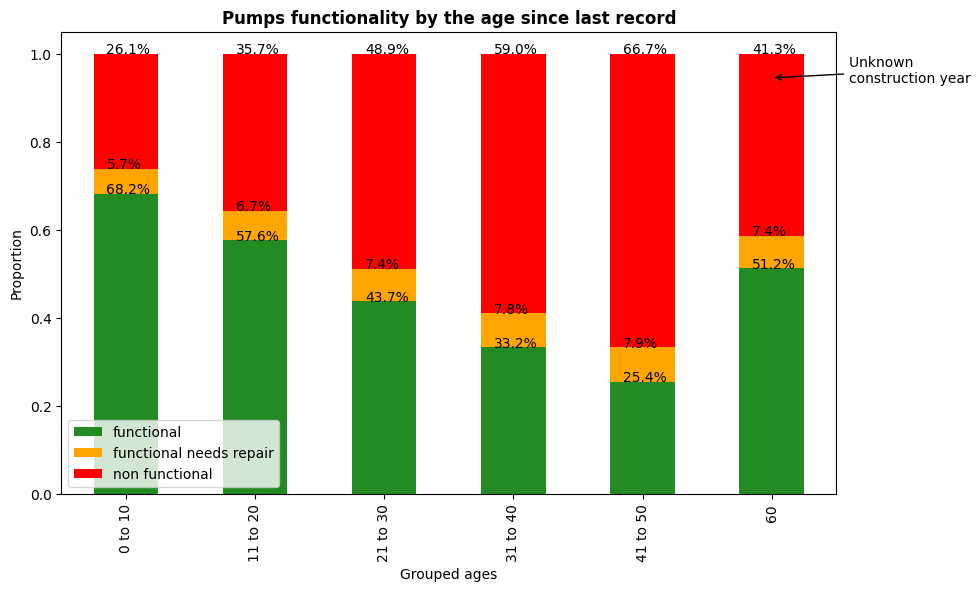

In [151]:
# Creating new dataframe using the previous function.
df_r_ages = df_r[['age_since_recorded', 'status_group']].copy()
df_r_ages['grouped_ages'] = df_r_ages.apply(lambda x: group_ages(x), axis = 1)

# The cross tab will find the percentage of functional pumps for each age group. 
cross_tab_ages = pd.crosstab(df_r_ages['grouped_ages'], df_r_ages['status_group'], normalize='index')

fig, ax = plt.subplots()

# Plotting a bar chart.
cross_tab_ages.plot(kind='bar', stacked=True, color=['forestgreen', 'orange', 'red'], figsize=(10, 6), ax=ax)

# Styling the graph.
plt.legend(loc="lower left")
plt.title('Pumps functionality by the age since last record', fontsize=12, fontweight='bold')
plt.xlabel("Grouped ages")
plt.ylabel("Proportion")

# Will add a note at the last column as this is unknown data. 
plt.annotate("Unknown \nconstruction year", xy=(5, 0.9), xytext=(5.6,0.89), xycoords=ax.get_xaxis_transform(), arrowprops=dict(arrowstyle="->"))

# Calculate the percantage for each bar and display it.
for n, x in enumerate([*cross_tab_ages.index.values]):
    for (proportion, loc) in zip(cross_tab_ages.loc[x], cross_tab_ages.loc[x].cumsum()):
                
        plt.text(x=n - 0.15, y=loc, s=f'{np.round(proportion * 100, 1)}%', color="black", fontsize=10)

plt.savefig('bar_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [153]:
# Reading the shapefile of Tanzania map.
tz_map = gpd.read_file('tza_admbnda_adm0_20181019/tza_admbnda_adm0_20181019.shp')

fig, ax = plt.subplots(figsize=(10,10))

# Plotting the map to the figure.
tz_map.plot(ax=ax, alpha=0.4,color='grey')

# Creating a dictionary of colors for the plt.
color_dict = dict({'functional':'forestgreen', 'non functional':'red', 'functional needs repair': 'orange'})

# Creating points using longitude and latitude with hue and size.
sns.scatterplot(data=df_r, x='longitude', y='latitude', hue='status_group', size='water_amount', palette=color_dict, alpha=0.5,ax=ax)

# Styling the graph.
plt.legend(loc="upper right")
plt.title('Functionality of water pumps in Tanzantia', fontsize=15,fontweight='bold')
plt.xlabel('Longitude', fontweight='bold')
plt.ylabel('Latitude', fontweight='bold')

plt.savefig('tanzania_map.png', dpi=300, bbox_inches='tight')

plt.show()

DriverError: tza_admbnda_adm0_20181019/tza_admbnda_adm0_20181019.shp: No such file or directory

# Data Visualisation - Toluwalase Soyebo

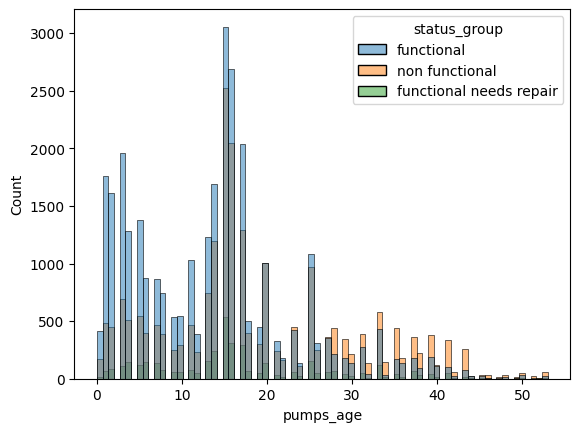

In [154]:
# Visalise the distribtuion of the pumps age
colour_option = ['blue', 'orange', 'green'] 
sns.histplot(data=train_df, x='pumps_age', hue='status_group', palette=colour_option )

plt.show()

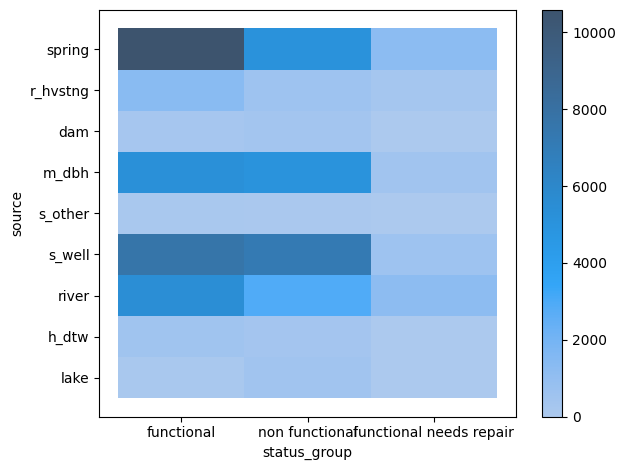

In [155]:
# Visualising the relationship between the status_group and the source.
ax = sns.histplot(data=train_df, x='status_group', y='source', cbar=True)
#ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
plt.show()

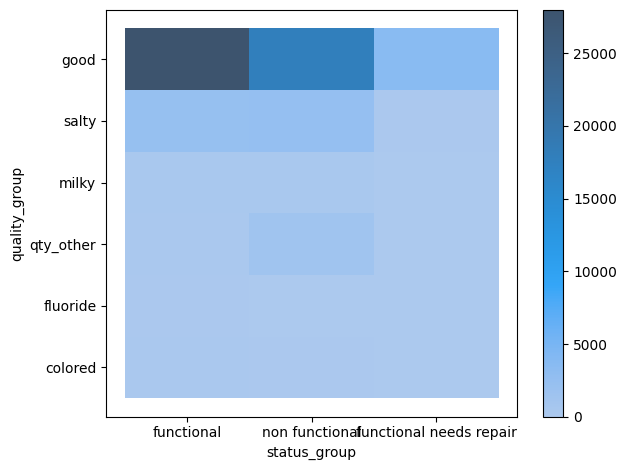

In [156]:
# Visualising the relationship between the status_group and the quality_group.
ax = sns.histplot(data=train_df, x='status_group', y='quality_group', cbar=True)
#ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
plt.show()

# Feature selection - Rashed Alaleeli

## Converting categorical features

#### Converting the training datasets

In [157]:
# Selecting all categorical features.
categorical = df_r.select_dtypes(include=['object'])

# Printing the number of unique values in each categorical feature.
for col in categorical.columns:
    print(col + " have " + str(len(df_r[col].unique())) + " unique values.")

funder have 6 unique values.
installer have 6 unique values.
basin have 9 unique values.
subvillage have 18567 unique values.
region have 21 unique values.
lga have 124 unique values.
ward have 2033 unique values.
public_meeting have 3 unique values.
scheme_management have 12 unique values.
permit have 3 unique values.
extraction_type_class have 7 unique values.
management have 12 unique values.
management_group have 5 unique values.
payment_type have 7 unique values.
water_quality have 8 unique values.
quantity have 5 unique values.
source_type have 7 unique values.
source_class have 3 unique values.
waterpoint_type_group have 6 unique values.
status_group have 3 unique values.


Any feature that have many unique values will be dropped.

In [158]:
# Dropping features with many unique values.
df_r = df_r.drop(columns=['subvillage', 'lga', 'ward', 'region', 'management'])

In [159]:
categorical = df_r.select_dtypes(include=['object'])
categorical = categorical.drop(columns=['status_group'])

# Converting the features to numerical.
for col in categorical.columns:
    df_r[[col]] = df_r[[col]].apply(lambda x: pd.Categorical(x).codes)

In [160]:
# Converting the status group to a numerical values.
labels, categories = pd.factorize(df_r['status_group'])

# Creating a new column with numerical status group.
df_r['labels'] = labels
df_r.head()

,id,water_amount,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,...,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type_group,age_since_recorded,status_group,labels
0,69572,109.638204,5,1390,5,34.938093,-9.856322,1,11,5,...,4,0,6,1,6,0,1,12,functional,0
1,8776,0.000000,5,1399,5,34.698766,-2.147466,4,20,2,...,4,2,6,2,3,1,1,3,functional,0
2,34310,25.000000,5,686,5,37.460664,-3.821329,5,21,4,...,4,5,6,1,1,1,1,4,functional,0
3,67743,0.000000,5,263,5,38.486161,-11.155298,7,90,63,...,4,2,6,0,0,0,1,27,non functional,1
4,19728,0.000000,5,0,5,31.130847,-1.825359,4,18,1,...,1,2,6,3,3,1,1,60,functional,0


#### Converting the test datasets.

In [161]:
# Dropping features with many unique values.
test_r = test_r.drop(columns=['subvillage', 'lga', 'ward', 'region', 'management', 'indic'])

In [162]:
categorical = test_r.select_dtypes(include=['object'])

# Converting the features to numerical.
for col in categorical.columns:
    test_r[[col]] = test_r[[col]].apply(lambda x: pd.Categorical(x).codes)
    
test_r.head()

,id,water_amount,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,...,permit,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type_group,age_since_recorded
0,50785,0.0,5,634,5,35.290799,-4.059696,0,21,3,...,0,3,2,2,6,3,3,1,5,1
1,51630,0.0,1,1569,2,36.656709,-3.309214,5,2,2,...,0,0,4,2,6,2,6,0,1,13
2,17168,0.0,5,1567,5,34.767863,-5.004344,0,13,2,...,1,3,4,2,6,2,3,1,5,3
3,45559,0.0,5,267,5,38.058046,-9.418672,7,80,43,...,0,3,4,6,6,0,5,0,5,26
4,49871,500.0,5,1260,5,35.006123,-10.950412,7,10,3,...,0,0,4,1,6,1,6,0,1,13


## Finding Correlation

In [163]:
# Finding the correlation of each column.
df_r.corr()

C:\Users\psyts12\AppData\Local\Temp\ipykernel_9524\3956888322.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_r.corr()


,id,water_amount,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,...,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type_group,age_since_recorded,labels
id,1.000000,-0.002014,-0.005022,-0.001799,0.001929,0.002054,0.000958,0.000012,-0.003182,-0.003321,...,-0.002808,-0.003109,-0.000477,-0.000960,-0.000951,-0.002361,-0.005157,-0.004842,0.002950,0.004412
water_amount,-0.002014,1.000000,-0.049831,0.201652,-0.076868,-0.005737,-0.192346,0.083130,-0.077112,-0.081892,...,-0.112109,0.079409,-0.339503,0.045608,-0.021629,0.020824,0.020968,-0.072036,-0.206087,-0.098052
funder,-0.005022,-0.049831,1.000000,-0.028334,0.323186,0.019585,-0.009759,-0.007179,0.076815,0.111801,...,0.111224,-0.055632,0.083350,-0.041103,0.045283,-0.108000,0.015131,0.047783,-0.151937,-0.089939
gps_height,-0.001799,0.201652,-0.028334,1.000000,-0.010256,0.041295,0.091339,-0.102707,-0.148302,-0.155282,...,-0.172945,-0.004738,-0.021176,0.130902,-0.014715,0.074489,0.049817,-0.166715,-0.588523,-0.054780
installer,0.001929,-0.076868,0.323186,-0.010256,1.000000,0.117692,0.001122,0.031187,0.114595,0.136639,...,0.148579,-0.110334,0.072569,0.006048,0.037367,-0.109315,-0.016239,-0.008332,-0.058194,-0.022783
longitude,0.002054,-0.005737,0.019585,0.041295,0.117692,1.000000,-0.298446,0.530543,0.147336,0.251992,...,0.207178,-0.102746,0.089326,-0.056129,0.001621,-0.092299,-0.048480,-0.111721,-0.423396,-0.049362
latitude,0.000958,-0.192346,-0.009759,0.091339,0.001122,-0.298446,1.000000,-0.229190,-0.244684,-0.193344,...,-0.010633,-0.076433,0.140573,-0.023848,0.132658,0.064806,-0.028240,0.117016,0.153980,0.001427
basin,0.000012,0.083130,-0.007179,-0.102707,0.031187,0.530543,-0.229190,1.000000,0.140147,0.189788,...,0.180122,-0.068161,-0.030068,-0.075824,-0.027103,-0.075873,0.031641,0.014857,-0.246435,0.014129
region_code,-0.003182,-0.077112,0.076815,-0.148302,0.114595,0.147336,-0.244684,0.140147,1.000000,0.681544,...,0.149783,0.032070,0.142346,-0.065437,-0.067482,-0.142812,-0.076410,0.160893,-0.025443,0.084757
district_code,-0.003321,-0.081892,0.111801,-0.155282,0.136639,0.251992,-0.193344,0.189788,0.681544,1.000000,...,0.067785,0.018008,0.098331,-0.062132,-0.029633,-0.065570,-0.052202,0.086727,-0.033656,0.040080


In [164]:
# Selecting numerical features and dropping the id and target. 
numerical_columns = df_r.select_dtypes(include=np.number)
numerical_columns = numerical_columns.drop(columns= ['id', 'labels'])

# A list to store values for each column.
corr = []

# Looping through the columns.
for col in numerical_columns.columns:
    
    # Calculating the pearson coefficient and p-value.
    pearsoncoef, pvalue = stats.pearsonr(df_r[col], df_r['labels'])
    # Storing values in the list.
    corr.append([col, pearsoncoef, pvalue])
    
col_names = ["Feature", "Pearson Coefficient", "p-value"]

# Print the values for each column as a table.
print(tabulate(corr, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════════════╤═══════════════════════╤══════════════╕
│ Feature               │   Pearson Coefficient │      p-value │
╞═══════════════════════╪═══════════════════════╪══════════════╡
│ water_amount          │           -0.098052   │ 5.63733e-123 │
├───────────────────────┼───────────────────────┼──────────────┤
│ funder                │           -0.0899388  │ 1.06369e-103 │
├───────────────────────┼───────────────────────┼──────────────┤
│ gps_height            │           -0.0547801  │ 1.61217e-39  │
├───────────────────────┼───────────────────────┼──────────────┤
│ installer             │           -0.022783   │ 4.56785e-08  │
├───────────────────────┼───────────────────────┼──────────────┤
│ longitude             │           -0.0493617  │ 2.11841e-32  │
├───────────────────────┼───────────────────────┼──────────────┤
│ latitude              │            0.00142691 │ 0.732065     │
├───────────────────────┼───────────────────────┼──────────────┤
│ basin                 │

Splitting the data with 70:30 ratio one with all features and the other only features selected by the feature selection method.

In [165]:
data_r = df_r.drop(columns = ['id', 'status_group', 'labels'])
target_r = df_r['labels']

# Splitting the data into 70-30 train-test split.
Xr_train, Xr_test, yr_train, yr_test = train_test_split(data_r, target_r, test_size=0.3, random_state=42)

In [166]:
# Performing f_regression for selecting the best features.
Kbest = SelectKBest(score_func=f_regression, k=10)

selected = Kbest.fit_transform(data_r, target_r)
selected = Kbest.get_feature_names_out()
print(selected)

['water_amount' 'funder' 'gps_height' 'longitude' 'region_code'
 'extraction_type_class' 'quantity' 'source_type' 'waterpoint_type_group'
 'age_since_recorded']


In [167]:
# Selecting the data using the best features only.
selected_data = data_r[selected]

# Spliting the new data into 70-30 train-test split.
Xs_train, Xs_test, ys_train, ys_test = train_test_split(selected_data, target_r, test_size=0.3, random_state=42)

# Feature engineering - Toluwalase Soyebo

#####  Dealing with the binary categorical data and feature engineering

In [168]:
# all binary features use binary mapping
binary_mapping = {True:1, False:0}
train_df['public_meeting'] = train_df['public_meeting'].map(binary_mapping)
test_df['public_meeting'] = test_df['public_meeting'].map(binary_mapping)

train_df['permit'] = train_df['permit'].map(binary_mapping)
test_df['permit'] = test_df['permit'].map(binary_mapping)


In [169]:
train_df['public_meeting'].value_counts()

1    52704
0     4874
Name: public_meeting, dtype: int64

##### Dealing with ordinal data - feature engineering

In [170]:
# Incase some values are different in the test dataset, set all nan values also to be other. 
# ordinal mapping for ordianl features
payment_mapping = {'pay annually' : 4, 'pay monthly' : 4, 'pay per bucket' : 3, 'pay when scheme fails' : 2, 'never pay': 1, 'other' : 0, 'pay_other' : 0}
train_df['payment'] = train_df['payment'].map(payment_mapping)
test_df['payment'] = test_df['payment'].map(payment_mapping)

test_df.loc[test_df['quality_group'].isna(), 'quality_group'] = 'other'
quality_mapping = {'good' : 2, 'salty' : 1, 'milky' : 1, 'fluoride' : 1, 'colored': 1, 'qty_other' : 0, 'other' : 0}
train_df['quality_group'] = train_df['quality_group'].map(quality_mapping)
test_df['quality_group'] = test_df['quality_group'].map(quality_mapping)

test_df.loc[test_df['quantity'].isna(), 'quantity'] = 'other'
quantity_mapping = {'enough' : 2, 'dry' : 1, 'seasonal' : 1, 'insufficient' : 1, 'quant_other' : 0, 'other' : 0}
train_df['quantity'] = train_df['quantity'].map(quantity_mapping)
test_df['quantity'] = test_df['quantity'].map(quantity_mapping)

###### Feature engineering for nominal categorical data - One hot encoding

In [171]:
train_df.isnull().sum()

index                0
id                   0
amount_tsh           0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region_code          0
population           0
public_meeting       0
scheme_management    0
permit               0
extraction_type      0
payment              0
quality_group        0
quantity             0
source               0
source_class         0
waterpoint_type      0
status_group         0
pumps_age            0
dtype: int64

In [172]:
OH_df = train_df.copy()

In [173]:
# Separate the differnece between numeric and categorical data columns 
ctg_cols = OH_df.select_dtypes(include='object').columns.tolist()[:-1]
num_cols = OH_df.select_dtypes(include='number').columns.tolist()

In [174]:
#one hot encoding for nominal features
ohe = OneHotEncoder()

feature_arr= ohe.fit_transform(OH_df[ctg_cols]).toarray()
feature_arr_t = ohe.fit_transform(test_df[ctg_cols]).toarray()

feature_lbls = ohe.categories_
feature_lbls_t = ohe.categories_

feature_labels = np.concatenate(feature_lbls)
feature_labels_t = np.concatenate(feature_lbls_t)

ohfeatures = pd.DataFrame(feature_arr,columns = feature_labels)
ohfeatures_t = pd.DataFrame(feature_arr_t,columns = feature_labels_t)

num_features = OH_df.drop(ctg_cols, axis=1)
num_features_t = test_df.drop(ctg_cols, axis=1)

train_df = pd.merge(ohfeatures,num_features, left_index=True, right_index=True)
train_df.head()

,Danida,GOT,Hesawa,KKKt,Rwssp,Unicef,W_bank,W_vision,f_other,Commu,...,latitude,region_code,population,public_meeting,permit,payment,quality_group,quantity,status_group,pumps_age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-9.856322,11,109,1,0,4,2,2,functional,12
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-2.147466,20,280,1,1,1,2,1,functional,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-3.821329,21,250,1,1,3,2,2,functional,4
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-11.155298,9,58,1,1,1,2,1,non functional,27
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.825359,18,135,1,1,1,2,1,functional,14


In [175]:
# check for duplicates always a possibility with OHE
dub_col = train_df.columns[train_df.columns.duplicated()]
dub_col

Index(['Danida'], dtype='object')

In [176]:
dub_col = test_df.columns[test_df.columns.duplicated()]
dub_col

Index([], dtype='object')

In [177]:
train_df = train_df.loc[:,~train_df.columns.duplicated()]

In [178]:
test_df = test_df.loc[:,~test_df.columns.duplicated()]

In [179]:
print("Number of null values in the training dataframe is: " + str(train_df.isnull().values.sum()))

Number of null values in the training dataframe is: 0


In [180]:
test_data = pd.merge(ohfeatures_t,num_features_t, left_index=True, right_index=True)
test_data.head()

,Danida,GOT,Hesawa,KKKt,Rwssp,Unicef,W_bank,W_vision,f_other,Commu,...,longitude,latitude,region_code,population,public_meeting,permit,payment,quality_group,quantity,pumps_age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,35.290799,-4.059696,21,321,1,1,1,2,1,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.656709,-3.309214,2,300,1,1,1,2,1,13
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,34.767863,-5.004344,13,500,1,1,1,2,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,38.058046,-9.418672,8,250,1,1,0,2,1,26
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,35.006123,-10.950412,10,60,1,1,4,2,2,13


In [181]:
print("Number of null values in the hidden test dataframe is: " + str(test_df.isnull().values.sum()))

Number of null values in the hidden test dataframe is: 0


#### Feature selection and standardisation

In [182]:
#split and standardise model
y = train_df['status_group']
X = train_df.drop(columns=['status_group','id'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

 1) longitude                      0.132652
 2) latitude                       0.131808
 3) index                          0.098195
 4) pumps_age                      0.068137
 5) gps_height                     0.067061
 6) population                     0.048630
 7) quantity                       0.043854
 8) payment                        0.037738
 9) e_other                        0.028547
10) w_other                        0.026230
11) region_code                    0.025606
12) amount_tsh                     0.023874
13) quality_group                  0.015672
14) permit                         0.011392
15) c_s                            0.010636
16) f_other                        0.010581
17) gvty                           0.009776
18) VWC                            0.009522
19) i_other                        0.009257
20) h_p                            0.009132
21) DWE                            0.009130
22) c_s_m                          0.009009
23) spring                      

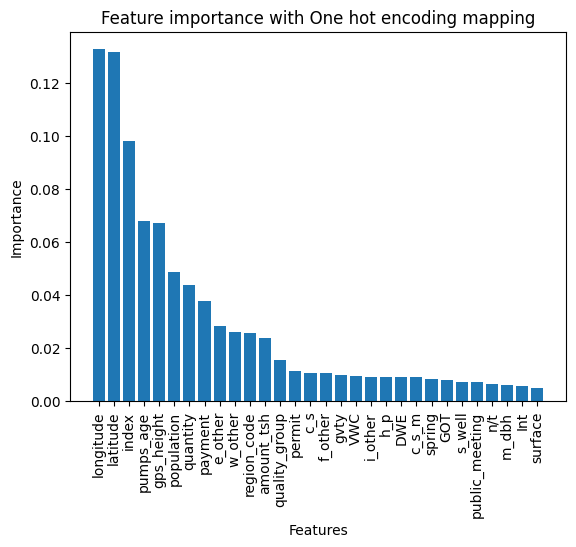

In [183]:
# using random classifer to get the most important features
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1][:30]
top20_importances = importances[indices]
top20_features = X_train.columns[indices]
for f in range(len(top20_importances)):
    print("%2d) %-*s %f" % (f + 1, 30, X_train.columns[indices[f]], importances[indices[f]]))

plt.bar(range(len(top20_importances)), top20_importances)
plt.title('Feature importance with One hot encoding mapping')
plt.xticks(range(len(top20_importances)), top20_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [250]:
# So for feature selection, only using features above a certain threshold, 
# drawing the feature importance from the one hot encoding only going to use the important features to train model. 
# tuning the parameters which threshold gives the best values. 

sfm = SelectFromModel(clf, threshold = 0.008, prefit=True)
#sfm.set_params(feature_names=)

X_selected_train = sfm.transform(X_train)
X_selected_test = sfm.transform(X_test)

C:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


###### Feature engineering for nominal categorical data - nominal mapping

In [185]:
#M_df = train_df.copy()
# the functions to map the data
#funder_mapping = {'GOT': 8, 'Danida': 7, 'Unicef': 6, 'W_bank': 5, 'Hesawa': 4, 'KKKt' : 3, 'W_vision' : 2, 'Rwssp' : 1, 'other' : 0}
#M_df['funder'] = M_df['funder'].map(funder_mapping)

#installer_mapping = {'DWE' : 4, 'RWE' : 4, 'GOV' : 3, 'Danida' : 2, 'Commu': 1, 'other' : 0}
#M_df['installer'] = M_df['installer'].map(installer_mapping)

#basin_mapping = {'Pan' : 8, 'Ruf' : 7, 'W/R' : 6, 'Int' : 5, 'R/S': 4, 'L_Tng' : 3, 'L_nya' : 2, 'L_vtra' : 1, 'other' : 0}
#M_df['basin'] = M_df['basin'].map(basin_mapping)

#scheme_mapping = {'VWC' : 8, 'W_brd' : 7, 'W_auth' : 6, 'WUA' : 5, 'WUG' : 4, 'cmp': 3, 'Par' : 2, 'PO' : 1, 'other' : 0}
#M_df['scheme_management'] = M_df['scheme_management'].map(scheme_mapping)

#extraction_mapping = {'gvty' : 8, 'sub' : 7, 'n/t' : 6, 'swn80' : 5, 'i_mrk': 4, 'mono' : 3, 'ksb' : 2, 'afri' : 1,  'other' : 0}
#M_df['extraction_type'] = M_df['extraction_type'].map(extraction_mapping)

#source_mapping =  {'spring' : 8, 'river' : 7, 's_well' : 6, 'm_dbh' : 5, 'r_hvstng': 4, 'h_dtw' : 3, 'lake' : 2, 'dam' : 1,  'other' : 0}
#M_df['source'] = M_df['source'].map(source_mapping)

#s_class_mapping = {'g_water' : 2, 'surface' : 1}
#M_df['source_class'] = M_df['source_class'].map(s_class_mapping)

#water_mapping = {'c_s' : 3, 'h_p' : 2, 'c_s_m' : 1, 'other' : 0}
#M_df['waterpoint_type'] = M_df['waterpoint_type'].map(water_mapping)

#cat_cols = M_df.select_dtypes(include='object').columns
#cat_cols

#y = M_df['status_group']
#X = M_df.drop(columns = ['status_group', 'id'])
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
#stdsc = StandardScaler()
#X_train_std = stdsc.fit_transform(X_train)
#X_test_std = stdsc.transform(X_test)

#clf = RandomForestClassifier(n_estimators=100, random_state=0)
#clf.fit(X_train, y_train)
#importances = clf.feature_importances_
#indices = np.argsort(importances)[::-1]
#for f in range(X_train.shape[1]):
#    print("%2d) %-*s %f" % (f + 1, 30, X_train.columns[indices[f]], importances[indices[f]]))
#plt.bar(range(X_train.shape[1]), importances[indices])
#plt.title('Feature importance with ordinal mapping')
#plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
#plt.xlabel("Features")
#plt.ylabel("Importance")
#plt.show()

# Classification models - Rashed Alaleeli

### Decision Tree

In [186]:
# Classification model (decision tree).
dtc_model = tree.DecisionTreeClassifier()

# A dictionary of parameter for the model to be tuned.
dtc_params = {'max_depth': [2, 3, 5, 10, 20],
          'min_samples_leaf': [5, 10, 20, 50, 100],
          'criterion': ["gini", "entropy"] }

# Finding the optimal parameters.
param_search = GridSearchCV(estimator=dtc_model, param_grid=dtc_params, cv=4, n_jobs = -1)

# Fitting the training.
param_search.fit(Xr_train, yr_train)

# Printing the best parametes
param_search.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}

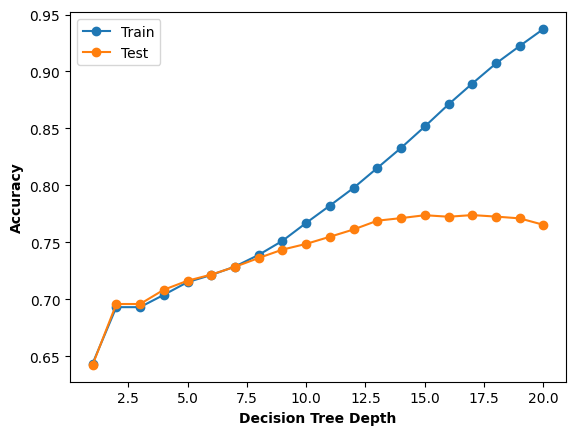

In [187]:
# Creating list for train and test scores.
train_scores = []
test_scores = []

depths = [i for i in range(1, 21)]

# Training the model using different depths and calculating the accuracy.
for i in depths:
        dtc_model = DecisionTreeClassifier(max_depth=i)
        dtc_model.fit(Xr_train, yr_train)
        train_pred = dtc_model.predict(Xr_train)
        train_acc = accuracy_score(yr_train, train_pred)
        train_scores.append(train_acc)
        test_pred = dtc_model.predict(Xr_test)
        test_acc = accuracy_score(yr_test, test_pred)
        test_scores.append(test_acc)
    
# Plotting tree depth and accuracy of train and test.
plt.plot(depths, train_scores, '-o', label='Train')
plt.plot(depths, test_scores, '-o', label='Test')
plt.xlabel('Decision Tree Depth', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.legend()

plt.savefig('decision_plt.png', dpi=300, bbox_inches='tight')
plt.show()

After plotting the scores, at depth 20 the training scored reached above 90% and the test score around 75%, which tell us that the model preforms very well on the training set but not the test set, so that is overfitting. chose a depth of 80 where both are the same, and maximum accuracy.  

Accuracy on training set: 73.68%
Accuracy on test set: 73.48%


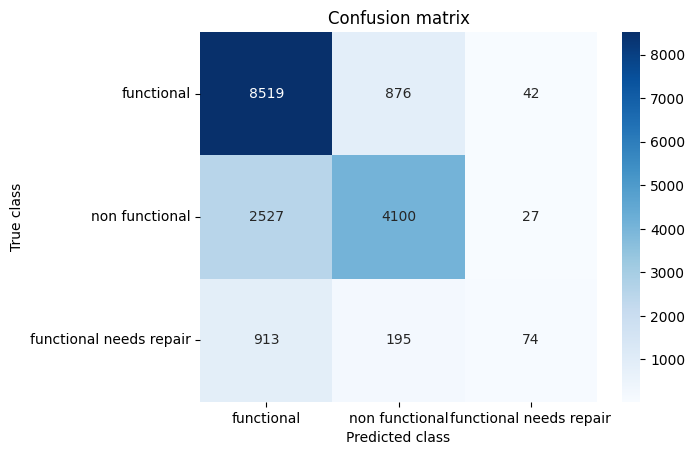

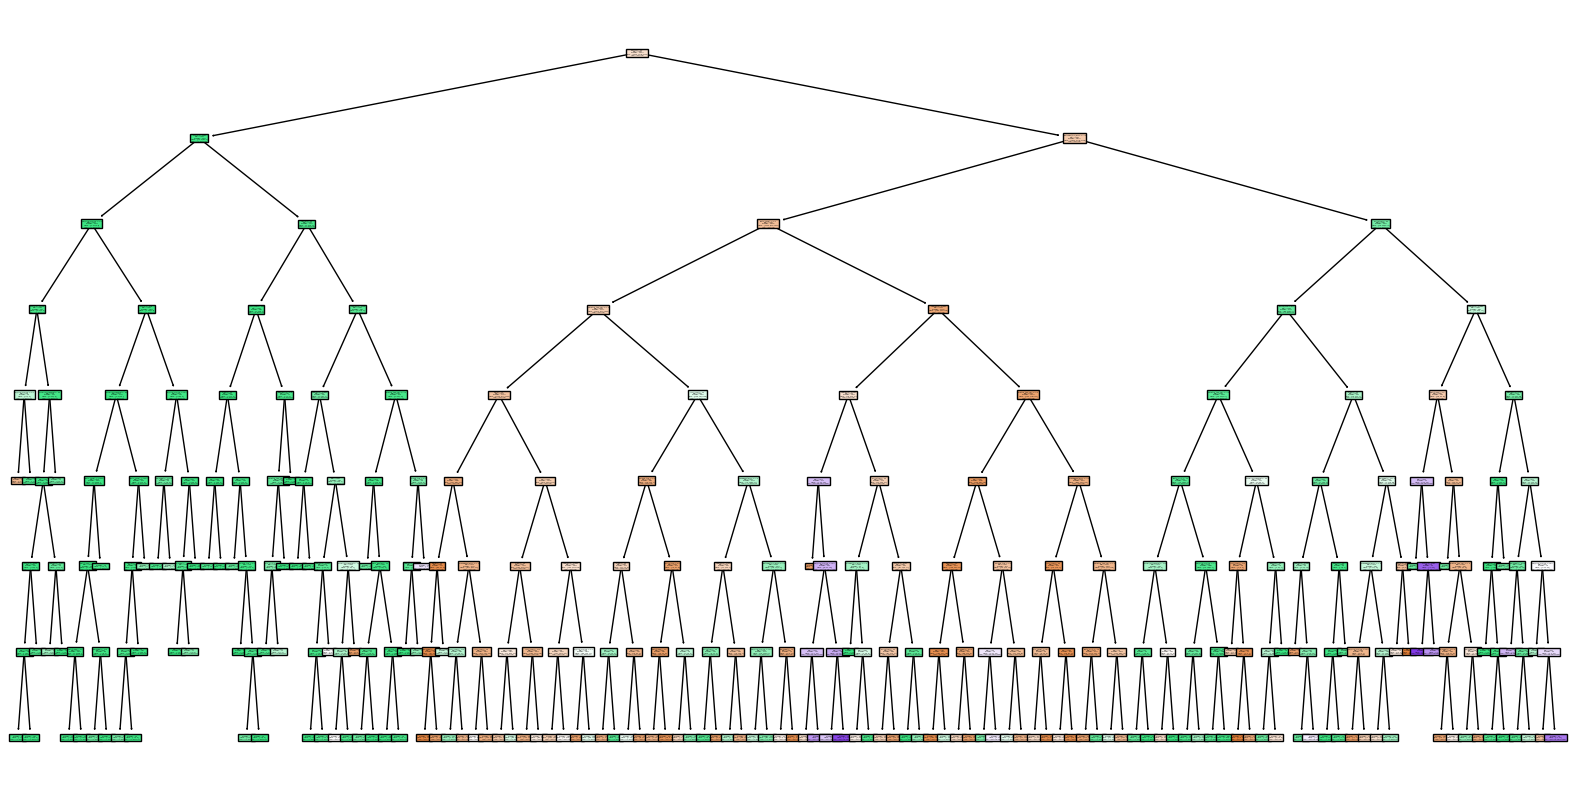

In [188]:
# Training the model with the optimal parameter.
dtc_model = tree.DecisionTreeClassifier(max_depth=8, criterion='gini', min_samples_leaf=10)
dtc_model.fit(Xr_train, yr_train)

# Predicting the labels using Xr_test.
dtc_pred = dtc_model.predict(Xr_test)

# Calculating the accuracy of the model on the training and test set.
accuracy_train = round(dtc_model.score(Xr_train, yr_train) * 100, 2)
accuracy_test = round(dtc_model.score(Xr_test, yr_test) * 100, 2)

print(f"Accuracy on training set: {accuracy_train}%")
print(f"Accuracy on test set: {accuracy_test}%")

# Printing a confusion matrix.
cm = confusion_matrix(yr_test, dtc_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df_r.status_group.unique(), yticklabels=df_r.status_group.unique())
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()

# Printing the tree for the model.
plt.figure(figsize=(20,10))
plot_tree(dtc_model, filled=True, feature_names=data_r.columns.values, class_names=df_r.status_group.unique())
plt.show()

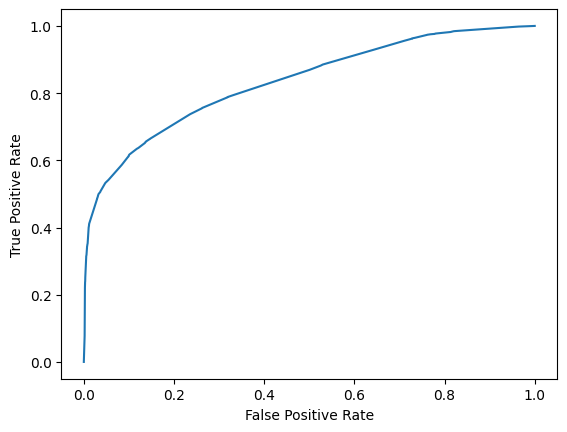

In [189]:
dtc_pred_proba = dtc_model.predict_proba(Xr_test)[::,1]
fpr, tpr, thresholds = roc_curve(yr_test,  dtc_pred_proba, pos_label=1)

# Plotting ROC curve.
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest Classifier

In [190]:
# Parameter tuning of random forest classifier
rfc_model = RandomForestClassifier()

rfc_params = {'max_depth': [5,10,15,20],
          'min_samples_leaf': [1, 2, 3, 4, 5],
          'min_samples_split': [2,3,4,5,6],
          'n_estimators': [100, 200, 300, 400] }

# Finding the optimal parameters by randomly choosing parameters.
param_search = RandomizedSearchCV(estimator=rfc_model, param_distributions=rfc_params, cv=4, n_jobs = -1, random_state=42)

# Fitting the training.
param_search.fit(Xr_train, yr_train)

# Printing the best parametes
param_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 20}

Accuracy on training set: 91.79%
Accuracy on test set: 81.07%


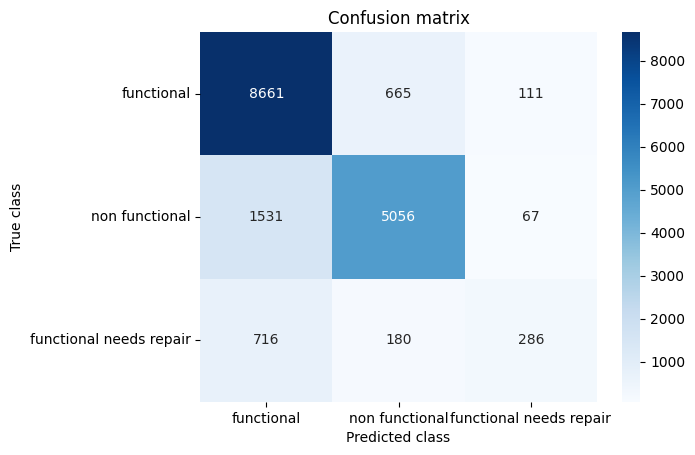

In [191]:
# Training the model with the optimal parameter.
rfc_model = RandomForestClassifier(n_estimators=300, min_samples_leaf=1, min_samples_split=5, max_depth=20, random_state=42)
rfc_model.fit(Xr_train, yr_train)

# Predicting the labels using Xr_test.
rfc_pred = rfc_model.predict(Xr_test)

# Calculating the accuracy of the model on the training and test set.
accuracy_train = round(rfc_model.score(Xr_train, yr_train) * 100, 2)
accuracy_test = round(rfc_model.score(Xr_test, yr_test) * 100, 2)

print(f"Accuracy on training set: {accuracy_train}%")
print(f"Accuracy on test set: {accuracy_test}%")

# Printing a confusion matrix.
cm = confusion_matrix(yr_test, rfc_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df_r.status_group.unique(), yticklabels=df_r.status_group.unique())
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()

### Multi-layer Perceptron (MLP)

In [192]:
neurons = [3, 4, 5, 6, 7]
accuracy_scores = []

# Experimenting the classifier with different numbers of neurons.
for n in neurons:
    mlp_model = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic', random_state=42)
    mlp_model.fit(Xr_train, yr_train)

    yr_pred_test = mlp_model.predict(Xr_test)
    accuracy_scores.append(accuracy_score(yr_test, yr_pred_test))

# Looking for number of neurons that maximises the accuracy.
for i in range(len(neurons)):
    print("Number of neurons of: " + str(neurons[i]) + " has an accuracy of " + str(accuracy_scores[i]))

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons of: 3 has an accuracy of 0.5993168528917965
Number of neurons of: 4 has an accuracy of 0.6922364383720258
Number of neurons of: 5 has an accuracy of 0.6905575175128814
Number of neurons of: 6 has an accuracy of 0.7127887454408615
Number of neurons of: 7 has an accuracy of 0.7237885717593933


In [193]:
# Parameter tuning of multi-layer perceptron.
mlp_model = MLPClassifier(hidden_layer_sizes=(7,))

parameter_space = {
    'max_iter' : [10, 100, 500, 1000],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Finding the optimal parameters by randomly choosing parameters.
param_search = RandomizedSearchCV(mlp_model, parameter_space, n_jobs=-1, cv=5)

# Fitting the training.
param_search.fit(Xr_train, yr_train)

# Printing the best parametes.
param_search.best_params_

{'solver': 'adam',
 'max_iter': 1000,
 'learning_rate': 'adaptive',
 'alpha': 0.05,
 'activation': 'logistic'}

Accuracy on training set: 68.08%
Accuracy on test set: 68.29%


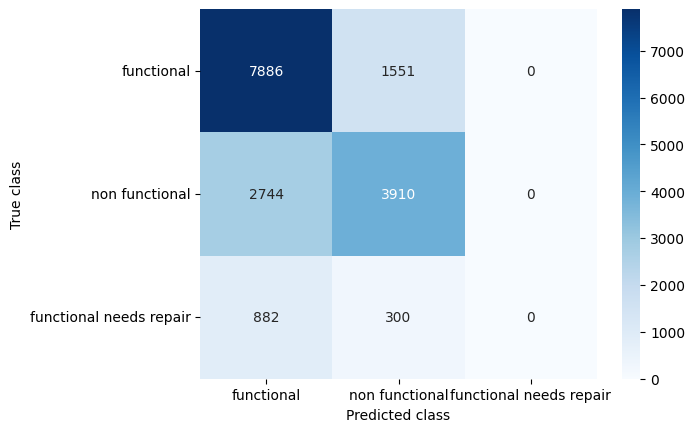

In [194]:
# Training the model with the optimal parameter.
mlp_model = MLPClassifier(hidden_layer_sizes=(7,), max_iter=100, random_state=42,
                          learning_rate='adaptive', solver='adam', activation='logistic', alpha=0.05)
mlp_model.fit(Xr_train, yr_train)

# Predicting the labels using Xr_test.
mlp_pred = mlp_model.predict(Xr_test)

# Calculating the accuracy of the model on the training and test set.
accuracy_train = round(mlp_model.score(Xr_train, yr_train) * 100, 2)
accuracy_test = round(mlp_model.score(Xr_test, yr_test) * 100, 2)

print(f"Accuracy on training set: {accuracy_train}%")
print(f"Accuracy on test set: {accuracy_test}%")

# Printing a confusion matrix.
cm = confusion_matrix(yr_test, mlp_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df_r.status_group.unique(), yticklabels=df_r.status_group.unique())
plt.xlabel("Predicted class")
plt.ylabel("True class")
# plt.title("Confusion matrix")
plt.savefig('confusion matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### Logistic Regression

In [195]:
# Training the model.
logr_model = LogisticRegression()
logr_model.fit(Xr_train, yr_train)

# Predicting the labels using Xr_test.
logr_predict = logr_model.predict(Xr_test)

# Calculating the accuracy of the model on the training and test set.
accuracy_train = round(logr_model.score(Xr_train, yr_train) * 100, 2)
accuracy_test = round(logr_model.score(Xr_test, yr_test) * 100, 2)

print(f"Accuracy on training set: {accuracy_train}%")
print(f"Accuracy on test set: {accuracy_test}%")

Accuracy on training set: 60.45%
Accuracy on test set: 61.18%


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support Vector Machine (SVM)

In [196]:
# Training the model.
svc_model = LinearSVC()
svc_model.fit(Xr_train, yr_train)

# Predicting the labels using Xr_test.
svc_pred = svc_model.predict(Xr_test)

# Calculating the accuracy of the model on the training and test set.
accuracy_training = round(svc_model.score(Xr_train, yr_train) * 100, 2)
accuracy_test = round(svc_model.score(Xr_test, yr_test) * 100, 2)

print(f"Accuracy on training set: {accuracy_training}%")
print(f"Accuracy on test set: {accuracy_test}%")

Accuracy on training set: 49.19%
Accuracy on test set: 49.09%


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Classification models - Toluwalase Soyebo

In [244]:
# conversion of Y to numeric so it can be used
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_total = label_encoder.fit_transform(y)

For the running of the code I have used the parameteres from random search as it takes a shorter time to run than gridsearch, although note that gridsearch gives optimal parameters

In [198]:
# hyper paramter tuning - Gridsearch is best but takes too lomng
#rc = RandomForestClassifier()
#rc_params = {'n_estimators': [50,100,150,200,250],
#    'max_depth': [None, 5, 10, 15, 20],
 #   'min_samples_split': [2, 5, 10],
 #   'min_samples_leaf': [1, 2, 4]}


#grid_search = GridSearchCV(rc,param_grid=rc_params,cv=10, n_jobs = -1)

#grid_search.fit(X_selected_train,y_train)

#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)

In [199]:
# hyper paramter tuning
rc = RandomForestClassifier()
rc_params = {'n_estimators': [50,100,150,200,250],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

rc_search = RandomizedSearchCV(estimator = rc, param_distributions=rc_params,cv=10, n_jobs = -1, random_state = 42)
rc_search.fit(X_selected_train,y_train_encoded)

print("Best parameters: ", rc_search.best_params_)
print("Best score: ", rc_search.best_score_)

Best parameters:  {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best score:  0.7867704200633674


Accuracy on the train set: 96.71%
Accuracy on the test set: 78.78%


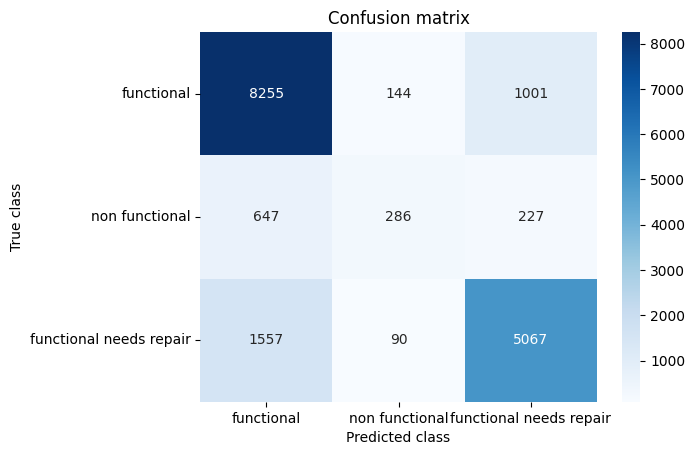

In [200]:
#applying the best parameters to model 
rc_best_param = rc_search.best_params_
rc_model = RandomForestClassifier(n_estimators=250, min_samples_leaf=1, min_samples_split=5, max_depth=None)
rc_model.fit(X_selected_train, y_train_encoded)

rc_accuracy_train = round(rc_model.score(X_selected_train, y_train_encoded) *100, 2)
rc_accuracy_test = round(rc_model.score(X_selected_test, y_test_encoded) *100, 2)
print(f'Accuracy on the train set: {rc_accuracy_train}%')
print(f'Accuracy on the test set: {rc_accuracy_test}%')

rc_pred = rc_model.predict(X_selected_test)
cm = confusion_matrix(y_test_encoded, rc_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_df.status_group.unique(), yticklabels=train_df.status_group.unique())
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()

Accuracy scores: [0.79663077 0.78942341 0.7961966  0.79461572 0.79452888]
Mean accuracy: 0.794


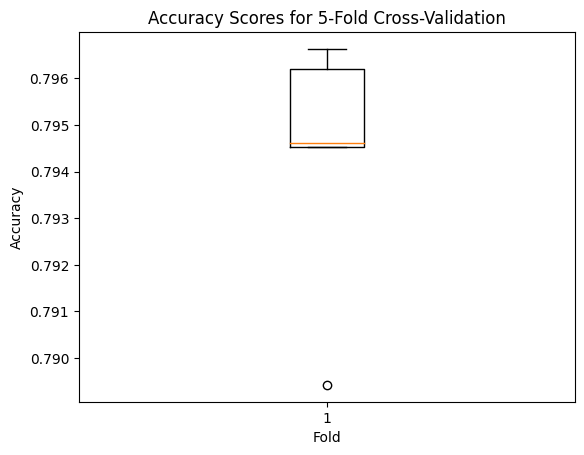

0.79 accuracy with a standard deviation of 0.00


In [203]:
# Perform 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rc = RandomForestClassifier(n_estimators = 250, min_samples_split= 5, min_samples_leaf= 1, max_depth= None)
scores = cross_val_score(rc,X, y, cv=skf)

print(f"Accuracy scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")

# Plot the accuracy scores for each fold
fig, ax = plt.subplots()
ax.boxplot(scores)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores for 5-Fold Cross-Validation')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [204]:
report = classification_report(y_test_encoded, rc_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      9400
           1       0.55      0.25      0.34      1160
           2       0.80      0.75      0.78      6714

    accuracy                           0.79     17274
   macro avg       0.71      0.63      0.65     17274
weighted avg       0.78      0.79      0.78     17274



In [205]:
#XGboost - gridsearch although takes long to compute
#gb_boost = XGBClassifier()
#xgb_params= {'n_estimators': [50,100,150,200,250], 
#            'learning_rate' : [0.025,0.05,0.075,0.1,0.5]
 #           'max_depth' : [5,10,15,20]
#            'max_features' : [0.1,0.2,0.3,0.4,0.5,0.6]
#   'lea[None, 5, 10, 15, 20],
#   'min_samples_split': [2, 5, 10],
#   'min_samples_leaf': [1, 2, 4]
    
#
#grid_search = GridSearchCV(xg_boost, param_grid = xgb_params,cv=10,n_jobs = -1)
#grid_search.fit(X_selected_train,y_train)
#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)

In [206]:
#XGboost - Hyperparameter tuning 
xgb_boost = XGBClassifier()
xgb_params= {'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]}

#grid_search = GridSearchCV(xg_boost, param_grid = xgb_params,cv=10,n_jobs = -1)
xgb_search = RandomizedSearchCV(estimator = xgb_boost, param_distributions=xgb_params,cv=5, n_jobs = -1, random_state = 42)           
xgb_search.fit(X_selected_train,y_train_encoded)
print("Best parameters: ", xgb_search.best_params_)
print("Best score: ", xgb_search.best_score_)

Best parameters:  {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}
Best score:  0.7701468147804751


Accuracy on the train set: 85.79%
Accuracy on the test set: 77.2%


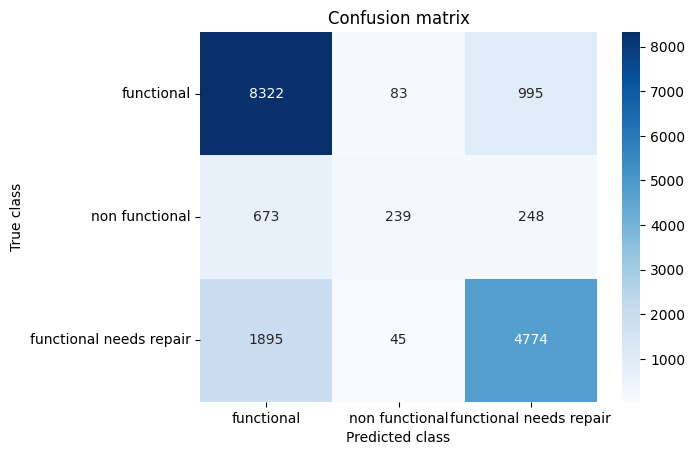

In [207]:
#using recommened parameters
xgb_best_param = xgb_search.best_params_
xgb_model = XGBClassifier(n_estimators = 300, max_depth=7, learning_rate=0.1) 
xgb_model.fit(X_selected_train,y_train_encoded)

xgb_accuracy_train = round(xgb_model.score(X_selected_train, y_train_encoded) *100, 2)
xgb_accuracy_test = round(xgb_model.score(X_selected_test, y_test_encoded) *100, 2)
print(f'Accuracy on the train set: {xgb_accuracy_train}%')
print(f'Accuracy on the test set: {xgb_accuracy_test}%')

xgb_pred = xgb_model.predict(X_selected_test)
cm = confusion_matrix(y_test_encoded, xgb_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_df.status_group.unique(), yticklabels=train_df.status_group.unique())
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()

Accuracy scores: [0.7852553  0.77648489 0.77848211 0.7813287  0.78462875]
Mean accuracy: 0.781


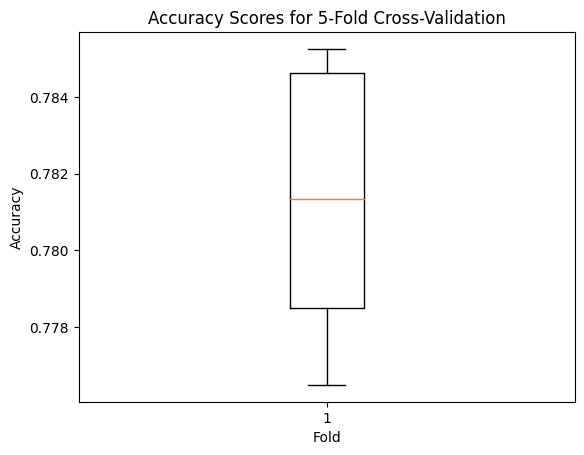

0.78 accuracy with a standard deviation of 0.00


In [210]:
 # Perform 5-fold cross-validation
xgb = XGBClassifier(n_estimators = 300, max_depth = 7, learning_rate =  0.1)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(xgb,X, y_total, cv=skf)
print(f"Accuracy scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")

# Plot the accuracy scores for each fold
fig, ax = plt.subplots()
ax.boxplot(scores)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores for 5-Fold Cross-Validation')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [211]:
report = classification_report(y_test_encoded, xgb_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      9400
           1       0.65      0.21      0.31      1160
           2       0.79      0.71      0.75      6714

    accuracy                           0.77     17274
   macro avg       0.74      0.60      0.63     17274
weighted avg       0.77      0.77      0.76     17274



Accuracy on the train set: 65.86%
Accuracy on the test set: 65.08%


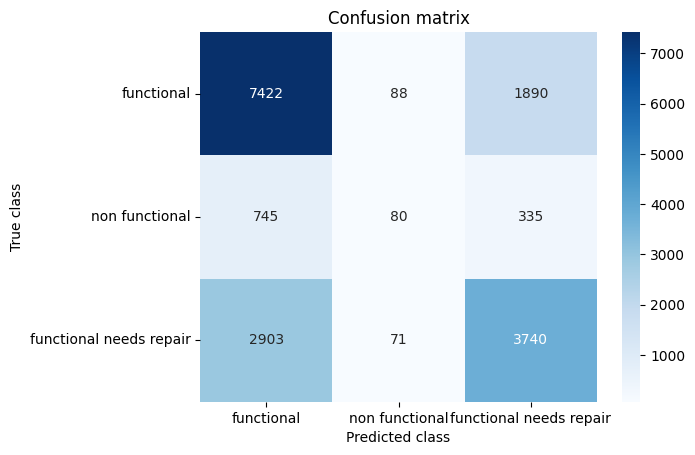

In [212]:
#GNB model - no need to do hyper parameter tuning 
gNB_model = GaussianNB()
gNB_model.fit(X_selected_train,y_train_encoded)

gNB_accuracy_train = round(gNB_model.score(X_selected_train, y_train_encoded) *100, 2)
gNB_accuracy_test = round(gNB_model.score(X_selected_test, y_test_encoded) *100, 2)
print(f'Accuracy on the train set: {gNB_accuracy_train}%')
print(f'Accuracy on the test set: {gNB_accuracy_test}%')

gNB_pred = gNB_model.predict(X_selected_test)

# use the predicted value by the gnb.
cm = confusion_matrix(y_test_encoded, gNB_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_df.status_group.unique(), yticklabels=train_df.status_group.unique())
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()

Accuracy scores: [0.65413338 0.65352553 0.6488364  0.65036908 0.65896657]
Mean accuracy: 0.653


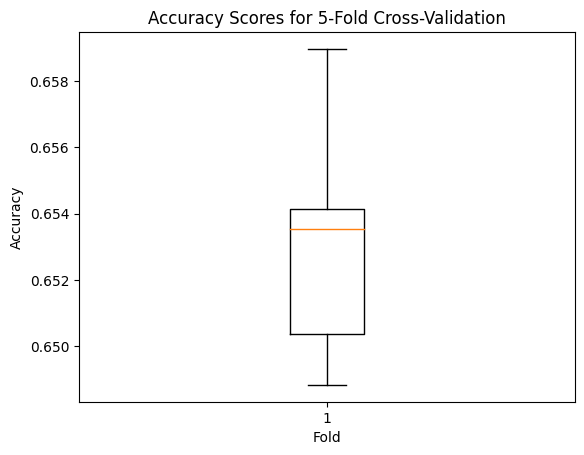

0.65 accuracy with a standard deviation of 0.00


In [213]:
# Perform 5-fold cross-validation
gNB = GaussianNB()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(gNB, X, y, cv=skf)
print(f"Accuracy scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")

# Plot the accuracy scores for each fold
fig, ax = plt.subplots()
ax.boxplot(scores)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores for 5-Fold Cross-Validation')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [214]:
report = classification_report(y_test_encoded, gNB_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      9400
           1       0.33      0.07      0.11      1160
           2       0.63      0.56      0.59      6714

    accuracy                           0.65     17274
   macro avg       0.54      0.47      0.48     17274
weighted avg       0.63      0.65      0.63     17274



In [215]:
# Hyper tuning for gradientboost 
# hyper tuning the parameter
#gb = GradientBoostingClassifier()
#gb_params= {'n_estimators': [50,100,150,200,250], 
#             'learning_rate' : [0.025,0.05,0.075,0.1,0.5]
#             'max_depth' : [5,10,15,20]
#             'max_features' : [0.1,0.2,0.3,0.4,0.5,0.6]
#    'lea[None, 5, 10, 15, 20],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
    
#}

#grid_search = GridSearchCV(gb, param_grid = gb_params,cv=10,n_jobs = -1)

#grid_search.fit(X_selected_train,y_train)

#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)

In [216]:
#gradient boosting hyper parameter tuning, can take a long time
gb = GradientBoostingClassifier()

gb_params= {'learning_rate': [0.1, 0.01, 0.001],
            'max_depth': [7,10,15],
            'n_estimators': [200, 300],
            'max_features' : [0.1,0.5, 0.05]
           }

#grid_search = GridSearchCV(xg_boost, param_grid = xgb_params,cv=10,n_jobs = -1)
gb_search = RandomizedSearchCV(estimator = gb, param_distributions=gb_params,cv=3, n_jobs = -1, random_state = 42)           
gb_search.fit(X_selected_train,y_train_encoded)
print("Best parameters: ", gb_search.best_params_)
print("Best score: ", gb_search.best_score_)

Best parameters:  {'n_estimators': 200, 'max_features': 0.5, 'max_depth': 15, 'learning_rate': 0.01}
Best score:  0.776176030257008


Accuracy on the train set: 97.29%
Accuracy on the test set: 78.61%


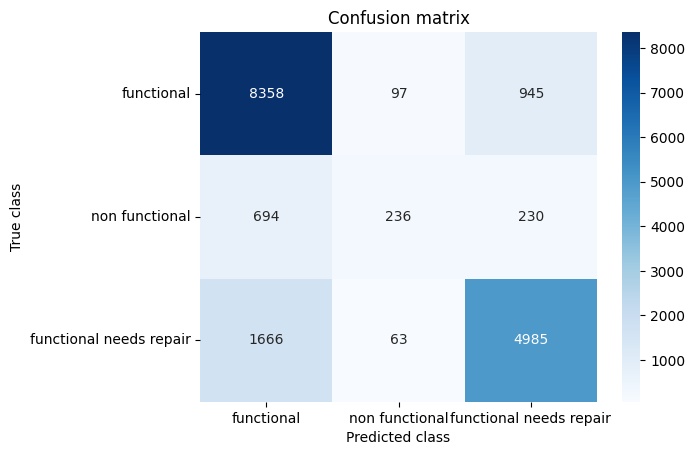

In [217]:
gb_best_param = gb_search.best_params_
gb_model = GradientBoostingClassifier(n_estimators=200, max_features=0.5, max_depth=15, learning_rate=0.01)
gb_model.fit(X_selected_train, y_train_encoded) 
gb_accuracy_train = round(gb_model.score(X_selected_train, y_train_encoded) *100, 2)
gb_accuracy_test = round(gb_model.score(X_selected_test, y_test_encoded) *100, 2)
print(f'Accuracy on the train set: {gb_accuracy_train}%')
print(f'Accuracy on the test set: {gb_accuracy_test}%')

gb_pred = gb_model.predict(X_selected_test)

cm = confusion_matrix(y_test_encoded, gb_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_df.status_group.unique(), yticklabels=train_df.status_group.unique())
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()

Accuracy scores: [0.79749913 0.7852553  0.79359152 0.79452888 0.79322623]
Mean accuracy: 0.793


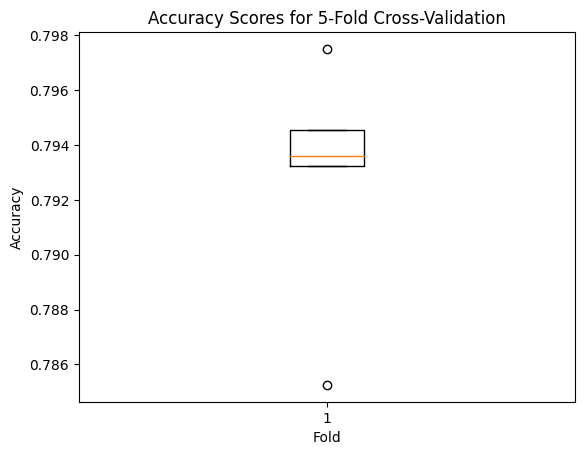

0.79 accuracy with a standard deviation of 0.00


In [218]:
# Perform 5-fold cross-validation
# for time constraints change n_estimators to be 50, but optimal is 300
gb = GradientBoostingClassifier(n_estimators=200, max_features=0.5, max_depth=15, learning_rate=0.01)
                    
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(gb, X, y, cv=skf)
print(f"Accuracy scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")

# Plot the accuracy scores for each fold
fig, ax = plt.subplots()
ax.boxplot(scores)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores for 5-Fold Cross-Validation')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [219]:
report = classification_report(y_test_encoded, gb_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      9400
           1       0.60      0.20      0.30      1160
           2       0.81      0.74      0.77      6714

    accuracy                           0.79     17274
   macro avg       0.73      0.61      0.64     17274
weighted avg       0.78      0.79      0.77     17274



# Model Evaluation - Rashed Alaleeli

In [252]:
# A function that will find the accuracy of the models based on the given data.
def model_evaluation(xtrain, xtest, ytrain, ytest):
    
    # Models that will be tests.
    models = [dtc_model, rfc_model, mlp_model, logr_model, svc_model]
    model_name = ['Decision tree', 'Random forest', 'Multi-layer percepton', 'Logistic regression',
                  'Linear support vector machine']
    
    # Looping through the models.
    for model, name in zip(models, model_name):
        # Training the models using the given data.
        model.fit(xtrain, ytrain)
        
        # Calculating both train and test accuracy.
        train_accuracy = round(model.score(xtrain, ytrain) * 100, 2)
        test_accuracy = round(model.score(xtest, ytest) * 100, 2)
        
        # Printing the values with the model name.
        print(name + ' have accuracy of: ' + str(train_accuracy) + '% training accuracy and ' 
              + str(test_accuracy) + '% test accuracy.')

#### Evaluation models using data with no normalisation.

In [253]:
# Training the models with the original data.
X1_train, X1_test, y1_train, y1_test = train_test_split(data_r, target_r, test_size=0.3, random_state=42)
        
model_evaluation(X1_train, X1_test, y1_train, y1_test)

Decision tree have accuracy of: 73.68% training accuracy and 73.48% test accuracy.
Random forest have accuracy of: 91.79% training accuracy and 81.07% test accuracy.
Multi-layer percepton have accuracy of: 68.08% training accuracy and 68.29% test accuracy.


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression have accuracy of: 60.45% training accuracy and 61.18% test accuracy.
Linear support vector machine have accuracy of: 39.08% training accuracy and 38.64% test accuracy.


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Evaluating models using data with normalisation.

In [254]:
data_normalize = data_r.copy()

# Normalizing numerical features.
data_normalize['population'] = ((data_normalize['population']-data_normalize['population'].min()) /(data_normalize['population'].max()-data_normalize['population'].min()))
data_normalize['water_amount'] = ((data_normalize['water_amount']-data_normalize['water_amount'].min()) /(data_normalize['water_amount'].max()-data_normalize['water_amount'].min()))

# Splitting the normalized data.
X2_train, X2_test, y2_train, y2_test = train_test_split(data_normalize, target_r, test_size=0.3, random_state=42)

# Training the models with normalized data.
model_evaluation(X2_train, X2_test, y2_train, y2_test)

Decision tree have accuracy of: 73.68% training accuracy and 73.48% test accuracy.
Random forest have accuracy of: 91.79% training accuracy and 81.07% test accuracy.


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-layer percepton have accuracy of: 71.56% training accuracy and 71.71% test accuracy.


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression have accuracy of: 59.8% training accuracy and 60.51% test accuracy.
Linear support vector machine have accuracy of: 57.53% training accuracy and 57.85% test accuracy.


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Evaluating models using data with feature selection.

In [255]:
# Selecting the best 10 performing features.
Kbest = SelectKBest(score_func=f_regression, k=10)
selected = Kbest.fit_transform(data_r, target_r)
selected = Kbest.get_feature_names_out()
 
# Using the data with the selected features.
selected_data = data_r[selected]

# Splitting the selected data.
X3_train, X3_test, y3_train, y3_test = train_test_split(selected_data, target_r, test_size=0.3, random_state=42)
      
# Training the models with selected data.
model_evaluation(X3_train, X3_test, y3_train, y3_test)

Decision tree have accuracy of: 73.89% training accuracy and 73.24% test accuracy.
Random forest have accuracy of: 90.92% training accuracy and 79.66% test accuracy.
Multi-layer percepton have accuracy of: 68.68% training accuracy and 68.97% test accuracy.


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression have accuracy of: 58.59% training accuracy and 58.88% test accuracy.
Linear support vector machine have accuracy of: 30.61% training accuracy and 30.61% test accuracy.


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Evaluating models using data with feature selection and normalisation.

In [256]:
# Using the normalized data with the selected features.
norm_selected = data_normalize[selected]

# Splitting the selected features and normalized data.
X4_train, X4_test, y4_train, y4_test = train_test_split(norm_selected, target_r, test_size=0.3, random_state=42)

# Training the models with selected features and normalized data.
model_evaluation(X4_train, X4_test, y4_train, y4_test)

Decision tree have accuracy of: 73.89% training accuracy and 73.24% test accuracy.
Random forest have accuracy of: 90.92% training accuracy and 79.66% test accuracy.


C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-layer percepton have accuracy of: 69.17% training accuracy and 69.29% test accuracy.


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression have accuracy of: 61.91% training accuracy and 62.21% test accuracy.
Linear support vector machine have accuracy of: 42.4% training accuracy and 41.85% test accuracy.


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Evaluating models using the age - 2nd research question

In [257]:
age_r = df_r[['age_since_recorded']]
target_r = df_r['labels']

X5_train, X5_test, y5_train, y5_test = train_test_split(age_r, target_r, test_size=0.3, random_state=42)
model_evaluation(X5_train, X5_test, y5_train, y5_test)

Decision tree have accuracy of: 58.7% training accuracy and 58.61% test accuracy.
Random forest have accuracy of: 58.7% training accuracy and 58.59% test accuracy.
Multi-layer percepton have accuracy of: 51.27% training accuracy and 51.72% test accuracy.
Logistic regression have accuracy of: 51.14% training accuracy and 51.51% test accuracy.
Linear support vector machine have accuracy of: 55.04% training accuracy and 55.0% test accuracy.


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


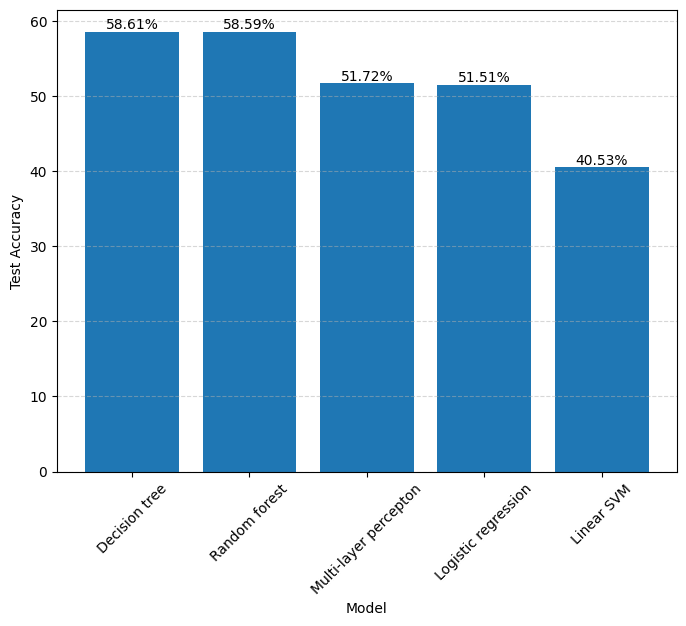

In [258]:
model_name = ['Decision tree', 'Random forest', 'Multi-layer percepton', 'Logistic regression',
                  'Linear SVM']

test_accuracies = [58.61, 58.59, 51.72, 51.51, 40.53]

plt.figure(figsize=(8, 6))
bars = plt.bar(model_name, test_accuracies)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar, accuracy in zip(bars, test_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}%', ha='center', va='bottom', fontsize=10)
    
plt.savefig('age_bar_plot.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

#### Evaluating models using Toluwalase Soyebo data.

In [259]:
model_evaluation(X_selected_train, X_selected_test, y_train_encoded, y_test_encoded)

Decision tree have accuracy of: 72.11% training accuracy and 70.82% test accuracy.
Random forest have accuracy of: 93.01% training accuracy and 78.46% test accuracy.
Multi-layer percepton have accuracy of: 54.56% training accuracy and 54.45% test accuracy.


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression have accuracy of: 55.62% training accuracy and 55.46% test accuracy.
Linear support vector machine have accuracy of: 40.24% training accuracy and 41.15% test accuracy.


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Plotting Predictions - Rashed Alaleeli

After the models evaluation, discoved that Random forest classifier have the highest accuracy on unseen data.

In [260]:
# Retraining the model.
rfc_model.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300,
                       random_state=42)

In [261]:
pred_test = test_r.drop(columns = ['id'])

# UnComment this if feature selection method is used and comment the above.
# pred_test = test_r[selected]

# Predicting the labels using the best preforming model.
final_prediction = rfc_model.predict(pred_test)

# Adding the labels to the test dataframe.
test_r['status_group'] = final_prediction

# Converting the labels from integers to categorical.
replace_labels = {0:'functional', 2:'functional needs repair', 1:'non functional'}

test_r.status_group = test_r.status_group.replace(replace_labels)

test_r.head()

,id,water_amount,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,...,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type_group,age_since_recorded,status_group
0,50785,0.0,5,634,5,35.290799,-4.059696,0,21,3,...,3,2,2,6,3,3,1,5,1,functional
1,51630,0.0,1,1569,2,36.656709,-3.309214,5,2,2,...,0,4,2,6,2,6,0,1,13,functional
2,17168,0.0,5,1567,5,34.767863,-5.004344,0,13,2,...,3,4,2,6,2,3,1,5,3,functional
3,45559,0.0,5,267,5,38.058046,-9.418672,7,80,43,...,3,4,6,6,0,5,0,5,26,non functional
4,49871,500.0,5,1260,5,35.006123,-10.950412,7,10,3,...,0,4,1,6,1,6,0,1,13,functional


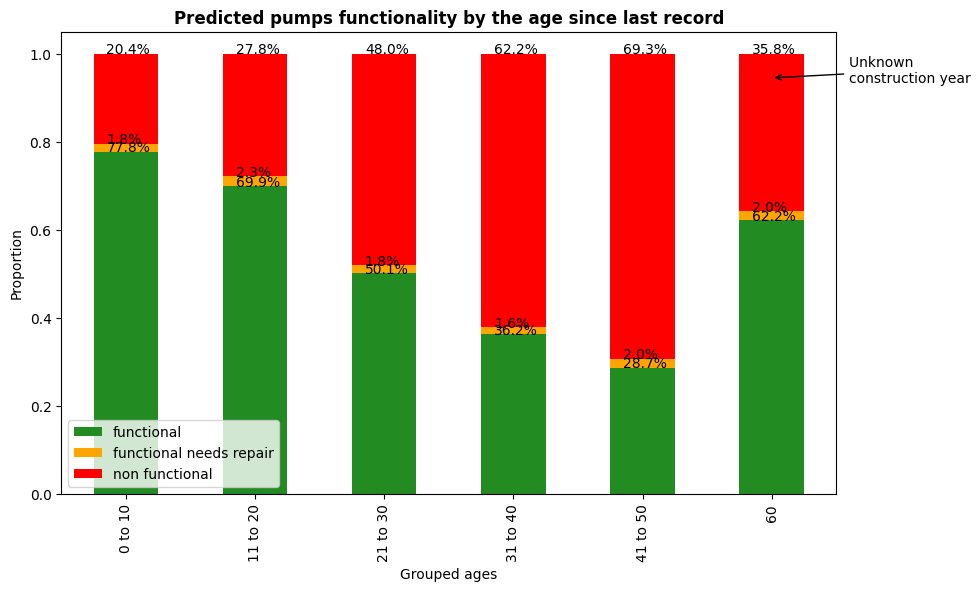

In [262]:
# Creating new dataframe from the predicted labels.
test_ages = test_r[['age_since_recorded', 'status_group']].copy()
test_ages['grouped_ages'] = test_ages.apply(lambda x: group_ages(x), axis = 1)

# The cross tab will find the percentage of functional pumps for each age group. 
cross_tab_test = pd.crosstab(test_ages['grouped_ages'], test_ages['status_group'], normalize='index')

fig, ax = plt.subplots()

# Plotting a bar chart.
cross_tab_test.plot(kind='bar', stacked=True, color=['forestgreen', 'orange', 'red'], figsize=(10, 6), ax=ax)

# Styling the graph.
plt.legend(loc="lower left")
plt.title('Predicted pumps functionality by the age since last record', fontsize=12, fontweight='bold')
plt.xlabel("Grouped ages")
plt.ylabel("Proportion")
plt.annotate("Unknown \nconstruction year", xy=(5, 0.9), xytext=(5.6,0.89), xycoords=ax.get_xaxis_transform(), arrowprops=dict(arrowstyle="->"))

# Calculate the percantage for each bar and display it.
for n, x in enumerate([*cross_tab_test.index.values]):
    for (proportion, loc) in zip(cross_tab_test.loc[x], cross_tab_test.loc[x].cumsum()):       
        plt.text(x=n - 0.15, y=loc, s=f'{np.round(proportion * 100, 1)}%', color="black", fontsize=10)
        
plt.savefig('predicted_bar_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### Adding the labels to the submission format

In [263]:
# Reading the submission format. 
submission = pd.read_csv('SubmissionFormat.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'SubmissionFormat.csv'

In [264]:
# Merging the labels with the submission format.
test_labels = test_r[['id','status_group']].copy()

submission = submission.drop(columns=['status_group'])

submission = pd.merge(submission, test_labels, on='id')

submission.head()

NameError: name 'submission' is not defined

In [265]:
# Exporting the results to a csv file.
submission.to_csv("final_submission.csv",sep=',', index=False)

NameError: name 'submission' is not defined

##  Evaluation - Toluwalase Soyebo

In [266]:
#create dataframe for the model and their scores
model_df = pd.DataFrame({
    'Model' : ['Random Forest Classifier', 'XGBClassifier','GaussianNB','GradientBoostingClassifier'],
    'Score' : [rc_accuracy_test, xgb_accuracy_test, gNB_accuracy_test, gb_accuracy_test ] 
})

In [267]:
#order score from largest to smallest
model_df = model_df.sort_values(by='Score', ascending=False)

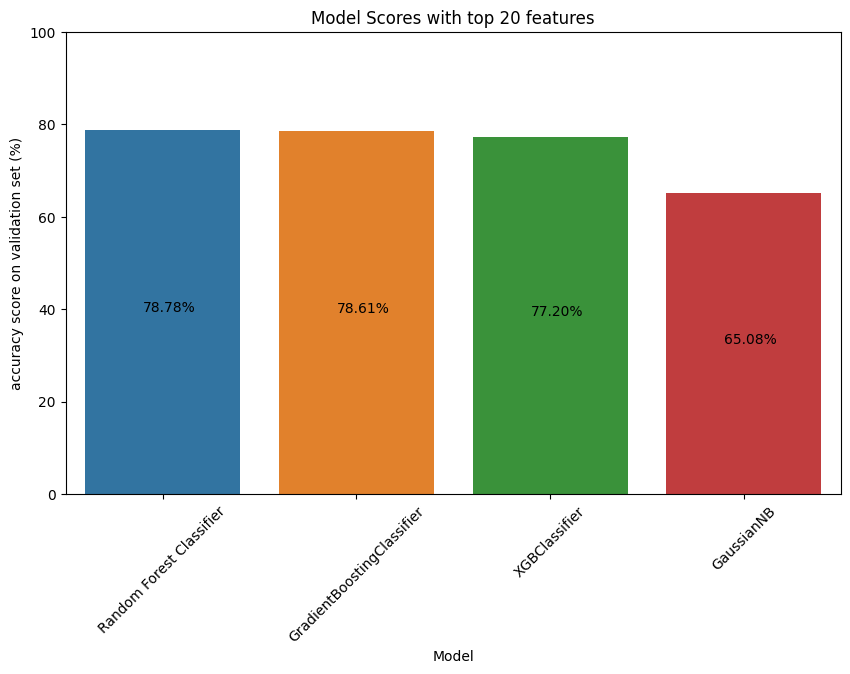

In [268]:
#visualise results
plt.figure(figsize=(10, 6))
train_ax = sns.barplot(data=model_df, x='Model', y='Score')
plt.xlabel('Model')
plt.ylabel('accuracy score on validation set (%)')
plt.title('Model Scores with top 20 features')
plt.xticks(rotation=45)
plt.ylim([0, 100])
for p in train_ax.patches:
        train_ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()*0.5))
plt.show()

#### Testing with just the pumps age - 2nd research question

Accuracy on the train set: 58.23%
Accuracy on the test set: 58.25%


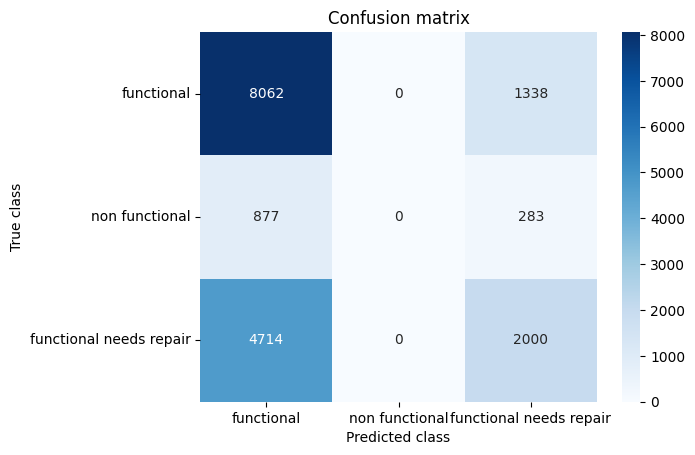

In [269]:
gNB_model_age = GaussianNB()
gNB_model_age.fit(X_train['pumps_age'].values.reshape(-1,1),y_train_encoded)

gNB_accuracy_train_age = round(gNB_model_age.score(X_train['pumps_age'].values.reshape(-1,1), y_train_encoded) *100, 2)
gNB_accuracy_test_age = round(gNB_model_age.score(X_test['pumps_age'].values.reshape(-1,1), y_test_encoded) *100, 2)
print(f'Accuracy on the train set: {gNB_accuracy_train_age}%')
print(f'Accuracy on the test set: {gNB_accuracy_test_age}%')

gNB_pred_age = gNB_model_age.predict(X_test['pumps_age'].values.reshape(-1,1))

# use the predicted value by the gnb.
cm = confusion_matrix(y_test_encoded, gNB_pred_age)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_df.status_group.unique(), yticklabels=train_df.status_group.unique())
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()

Accuracy on the train set: 58.86%
Accuracy on the test set: 58.06%


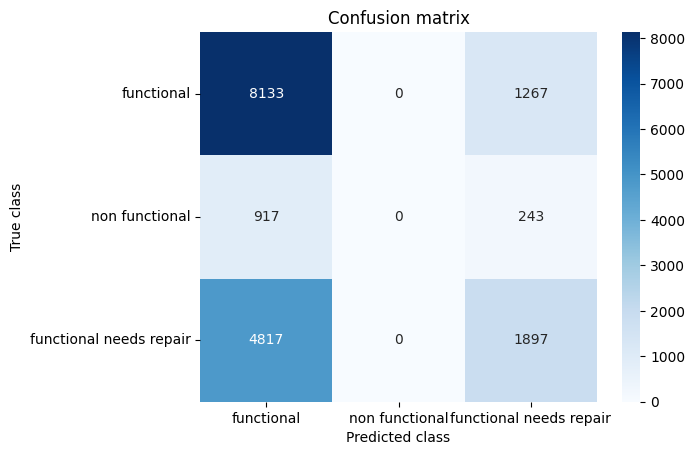

In [270]:
rc_model_age = RandomForestClassifier(**rc_best_param)
rc_model_age.fit(X_train['pumps_age'].values.reshape(-1,1), y_train_encoded)

rc_accuracy_train_age = round(rc_model_age.score(X_train['pumps_age'].values.reshape(-1,1), y_train_encoded) *100, 2)
rc_accuracy_test_age = round(rc_model_age.score(X_test['pumps_age'].values.reshape(-1,1), y_test_encoded) *100, 2)
print(f'Accuracy on the train set: {rc_accuracy_train_age}%')
print(f'Accuracy on the test set: {rc_accuracy_test_age}%')

rc_pred_age = rc_model_age.predict(X_test['pumps_age'].values.reshape(-1,1))
cm = confusion_matrix(y_test_encoded, rc_pred_age)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_df.status_group.unique(), yticklabels=train_df.status_group.unique())
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()

Accuracy on the train set: 58.86%
Accuracy on the test set: 58.06%


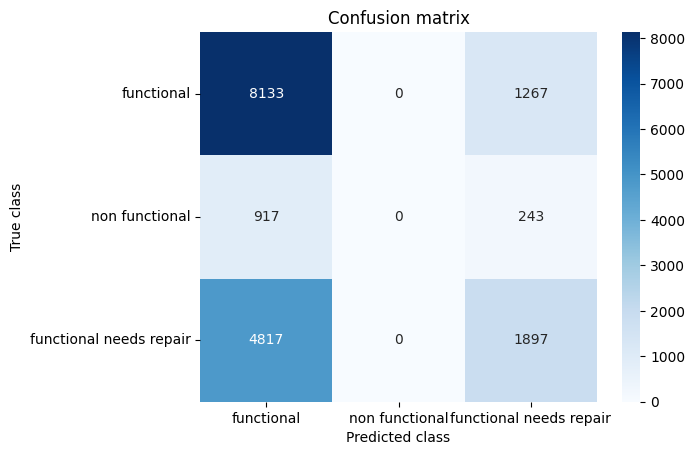

In [271]:
#using recommened parameters
xgb_model_age = XGBClassifier(**xgb_best_param) 
xgb_model_age.fit(X_train['pumps_age'].values.reshape(-1,1),y_train_encoded)

xgb_accuracy_train_age = round(xgb_model_age.score(X_train['pumps_age'].values.reshape(-1,1), y_train_encoded) *100, 2)
xgb_accuracy_test_age = round(xgb_model_age.score(X_test['pumps_age'].values.reshape(-1,1), y_test_encoded) *100, 2)
print(f'Accuracy on the train set: {xgb_accuracy_train_age}%')
print(f'Accuracy on the test set: {xgb_accuracy_test_age}%')

xgb_pred_age = xgb_model_age.predict(X_test['pumps_age'].values.reshape(-1,1))
cm = confusion_matrix(y_test_encoded, xgb_pred_age)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_df.status_group.unique(), yticklabels=train_df.status_group.unique())
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()

Accuracy on the train set: 58.86%
Accuracy on the test set: 58.06%


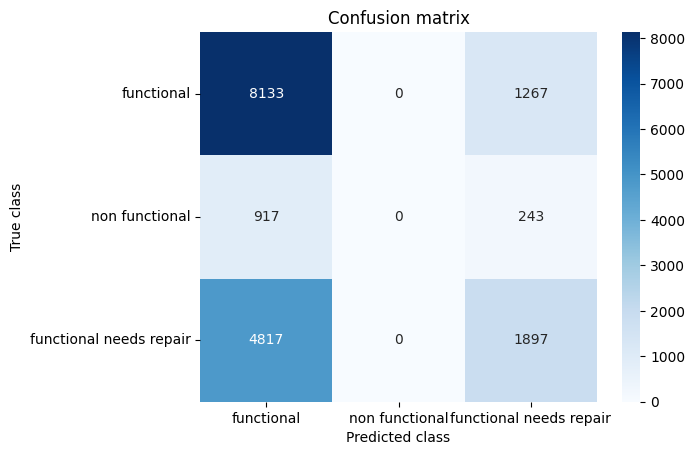

In [272]:
gb_model_age = GradientBoostingClassifier(**gb_best_param)

gb_model_age.fit(X_train['pumps_age'].values.reshape(-1,1), y_train_encoded) 
gb_accuracy_train_age = round(gb_model_age.score(X_train['pumps_age'].values.reshape(-1,1), y_train_encoded) *100, 2)
gb_accuracy_test_age = round(gb_model_age.score(X_test['pumps_age'].values.reshape(-1,1), y_test_encoded) *100, 2)
print(f'Accuracy on the train set: {gb_accuracy_train_age}%')
print(f'Accuracy on the test set: {gb_accuracy_test_age}%')

gb_pred_age = gb_model_age.predict(X_test['pumps_age'].values.reshape(-1,1))

cm = confusion_matrix(y_test_encoded, gb_pred_age)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_df.status_group.unique(), yticklabels=train_df.status_group.unique())
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()

In [273]:
model_df_age = pd.DataFrame({
    'Model' : ['Random Forest Classifier', 'XGBClassifier','GaussianNB','GradientBoostingClassifier'],
    'Score' : [rc_accuracy_test_age, xgb_accuracy_test_age, gNB_accuracy_test_age, gb_accuracy_test_age ] 
})

In [274]:
model_df_age = model_df_age.sort_values(by='Score', ascending=False)

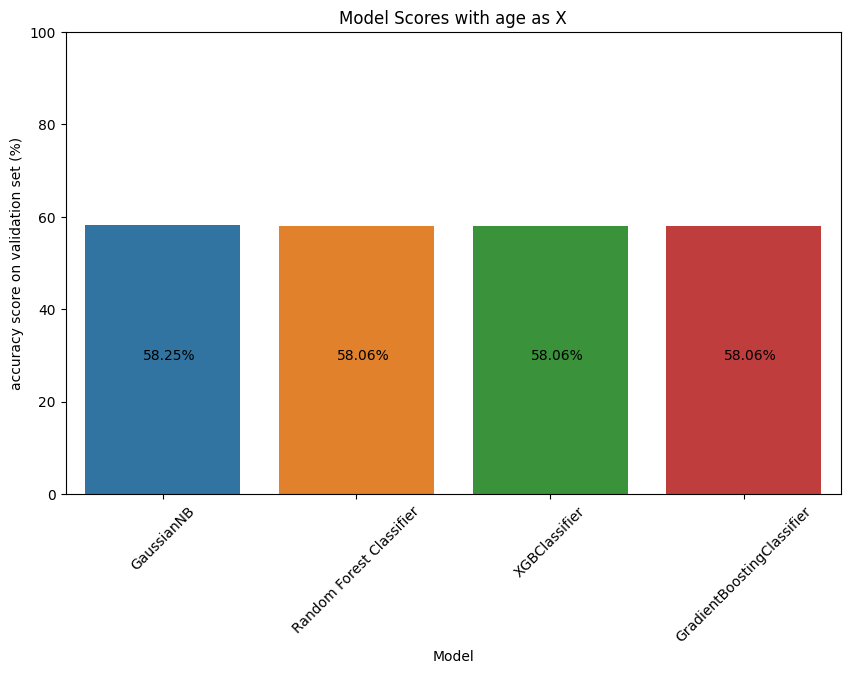

In [275]:
plt.figure(figsize=(10, 6))
train_ax = sns.barplot(data=model_df_age, x='Model', y='Score')
plt.xlabel('Model')
plt.ylabel('accuracy score on validation set (%)')
plt.title('Model Scores with age as X')
plt.xticks(rotation=45)
plt.ylim([0, 100])
for p in train_ax.patches:
        train_ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()*0.5))
plt.show()

# Model prediction - Toluwalase Soyebo

In [276]:
test_data.head()

,Danida,GOT,Hesawa,KKKt,Rwssp,Unicef,W_bank,W_vision,f_other,Commu,...,longitude,latitude,region_code,population,public_meeting,permit,payment,quality_group,quantity,pumps_age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,35.290799,-4.059696,21,321,1,1,1,2,1,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.656709,-3.309214,2,300,1,1,1,2,1,13
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,34.767863,-5.004344,13,500,1,1,1,2,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,38.058046,-9.418672,8,250,1,1,0,2,1,26
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,35.006123,-10.950412,10,60,1,1,4,2,2,13


In [278]:
#reformatting dropping columns not needed and ensuring no duplicates
test_data = test_data.drop(columns = ['id'])
dub_col = test_data.columns[test_data.columns.duplicated()]
test_data = test_data.loc[:,~test_data.columns.duplicated()]

In [279]:
#use best model
rc_model = RandomForestClassifier(n_estimators=250, min_samples_leaf=1, min_samples_split=5, max_depth=None)
rc_model.fit(X_selected_train, y_train_encoded)
top_test_features = sfm.transform(test_data)

rc_target_prediction = rc_model.predict(top_test_features)

test_data['status_group'] = rc_target_prediction

C:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


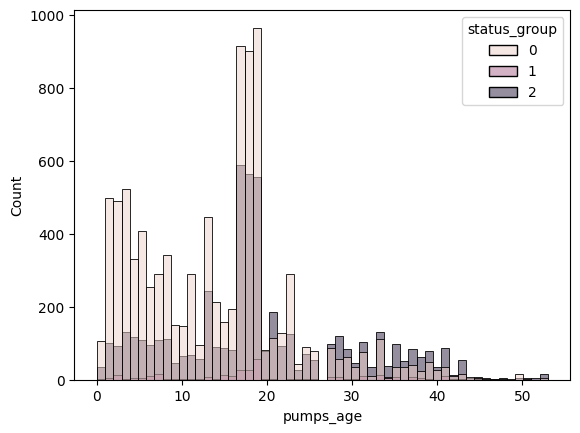

In [280]:
#visualise results
colour_option = ['blue', 'orange', 'green'] 
sns.histplot(data=train_df, x='pumps_age', hue='status_group', palette=colour_option )

plt.show()